# <center>Data visualization using Seaborn</center>

## This Notebook contains the usage of Seaborn plots. The types (specially 1-15) of plots that are done with Seaborn:
- <a href='#1'>Bar plot</a>
- <a href='#2'>Dist plot</a>
- <a href='#3'>Box plot</a>
- <a href='#4'>Swarm plot</a>
- <a href='#5'>Boxen plot</a>
- <a href='#6'>Strip plot</a>
- <a href='#7'>Pair Grid</a>
- <a href='#8'>Violin plot</a>
- <a href='#9'>Point plot</a>
- <a href='#10'>Clustermap</a>
- <a href='#11'>Heatmap</a>
- <a href='#12'>Facet plot</a>
- <a href='#13'>Joint plot</a>
- <a href='#14'>Pair plot</a>
- <a href='#15'>Catplot</a>
- <a href='#16'>Pie Chart</a>
- <a href='#17'>Area Plot</a>
- <a href='#18'>Geographic plot</a>
- <a href='#19'>Stack plots</a>
- <a href='#20'>Contour plots</a>
- <a href='#21'>Quiver plots</a>
- <a href='#22'>Spectrograms</a>
- <a href='#23'>Stem Plot</a>

## Import libraries

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Some of the palette names:
- coolwarm
- husl
- winter
- winter_r
- spring
- autumn
- hsv
- copper
- Blues_d
- pastel
- Purples

## <center> <a id='1'> Bar plot </a> </center>
- A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent.
- The bars can be plotted vertically or horizontally. A vertical bar chart is sometimes called a line graph.


In [2]:
tips = sns.load_dataset('tips')
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [3]:
tips.describe()

total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000

In [4]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


### Plot decribes the mean of tip on different days.
- Mean of all the tips on a particular day is calculatted and plotted on different days.
- If we don't mention anything, it calculates mean of that attribute.

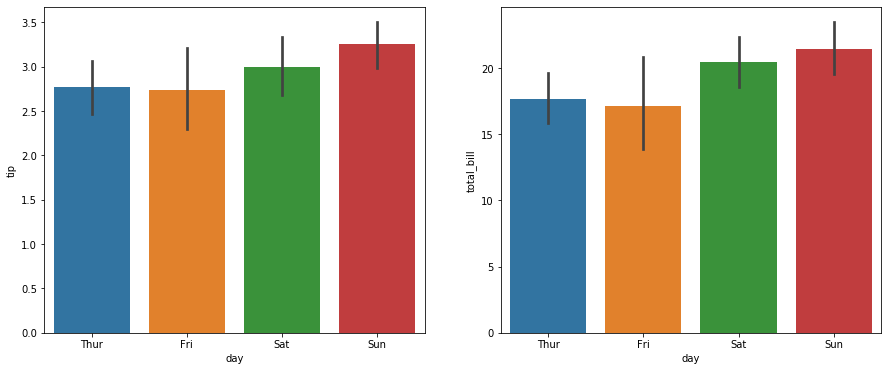

In [5]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(x='day', y='tip', data=tips)
plt.subplot(1,2,2)
sns.barplot(x='day', y='total_bill', data=tips)
plt.show()

### Visualize based on different categories in a column.
- 'hue' is used to visualize the data of different categories in one plot.
- 'palette' is used to change the colour of the plot.
- hue: 'sex' and palette: 'winter_r' and 'spring'
- the days of the week have been written irderly

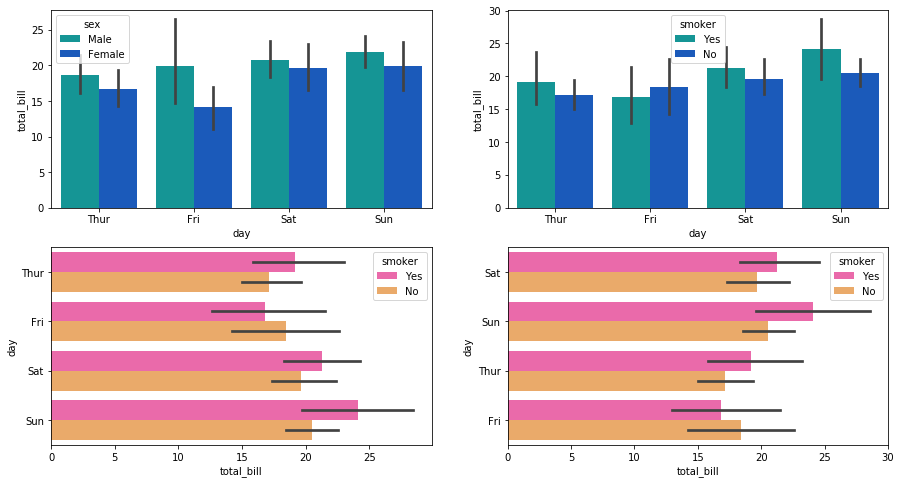

In [6]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.barplot(x='day', y='total_bill', data=tips, hue='sex', palette='winter_r')
plt.subplot(2,2,2)
sns.barplot(x='day', y='total_bill', data=tips, hue='smoker', palette='winter_r')
plt.subplot(2,2,3)
sns.barplot(x='total_bill', y='day', hue='smoker',data=tips, palette='spring')
plt.subplot(2,2,4)
sns.barplot(x='total_bill', y='day', hue='smoker',data=tips, palette='spring',order=['Sat', 'Sun', 'Thur', 'Fri'])
plt.show()

### Use 'median' instead of 'mean' to plot a bar graph. In this case, we have to change the estimator to 'median'.

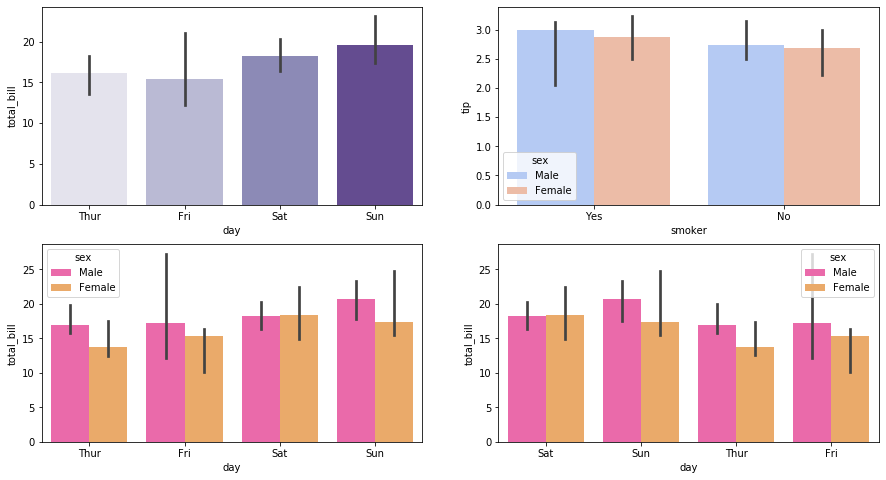

In [7]:
from numpy import median
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.barplot(x='day', y='total_bill', data=tips, estimator=median, palette='Purples')
plt.subplot(2,2,2)
sns.barplot(x='smoker', y='tip', data=tips, estimator=median, hue='sex', palette='coolwarm')
plt.subplot(2,2,3)
sns.barplot(x='day', y='total_bill', data=tips, estimator=median, hue='sex',palette='spring')
plt.subplot(2,2,4)
order=['Sat', 'Sun', 'Thur', 'Fri']
sns.barplot(x='day', y='total_bill', data=tips, estimator=median, hue='sex',palette='spring',order=order)
plt.show()

### use Standard deviation (std) instead of mean to draw the bar graph

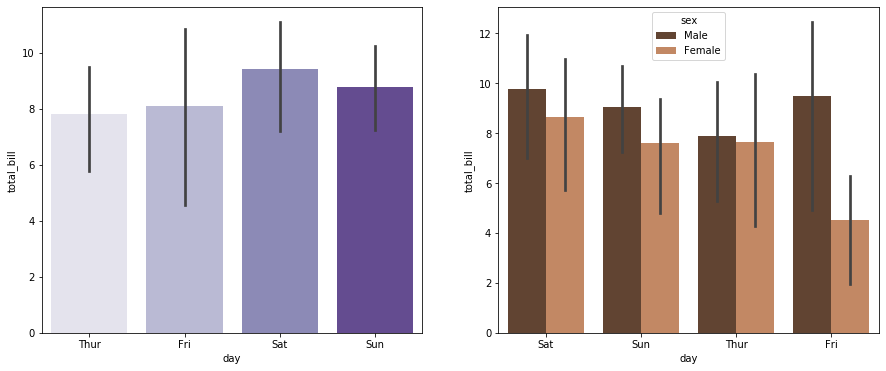

In [8]:
from numpy import std
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(x='day', y='total_bill', data=tips, estimator=std, palette='Purples')
plt.subplot(1,2,2)
sns.barplot(x='day', y='total_bill', data=tips, hue='sex',estimator=std, palette='copper',order=order)
plt.show()

### Change confidence interval 'ci'
**For example**, We measure the heights of 40 randomly chosen men, and get a mean height of 175cm,

We also know the standard deviation of men's heights is 20cm.

The 95% Confidence Interval (we show how to calculate it later) is:

175cm ± 6.2cm
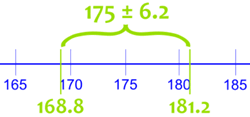

confidence interval 175 plus minus 6.2

This says the true mean of ALL men (if we could measure all their heights) is likely to be between 168.8cm and 181.2cm.

But it might not be!

The "95%" says that 95% of experiments like we just did will include the true mean, but 5% won't.

So there is a 1-in-20 chance (5%) that our Confidence Interval does NOT include the true mean.

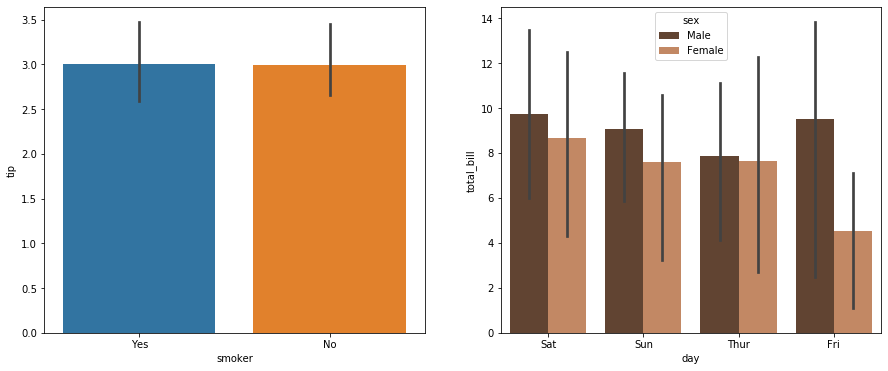

In [9]:
# ci - confidence interval (error part)
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(x='smoker', y='tip', data=tips, ci=100)
plt.subplot(1,2,2)
sns.barplot(x='day', y='total_bill', data=tips, hue='sex',estimator=std, palette='copper',order=order,ci=100)
plt.show()

### Change capsize of the error bars.

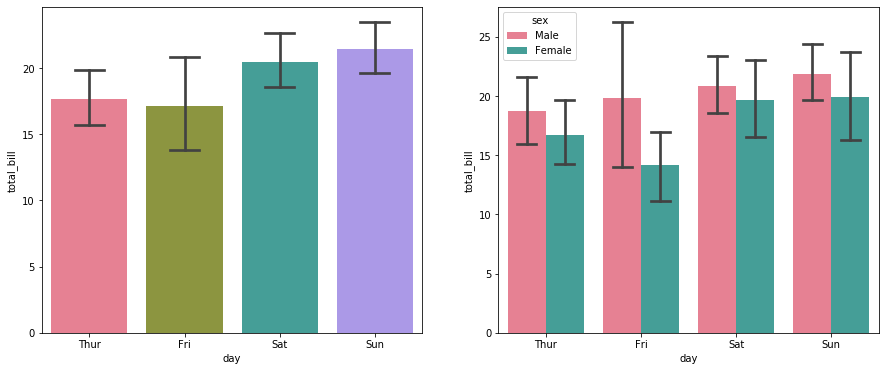

In [10]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(x='day', y='total_bill', data=tips, capsize=0.3, palette='husl')
plt.subplot(1,2,2)
sns.barplot(x='day', y='total_bill', data=tips, hue='sex', capsize=0.2, palette='husl')
plt.show()

### New color palette 
- using different palette
- using different capsize
- using different hue
- using a different saturation

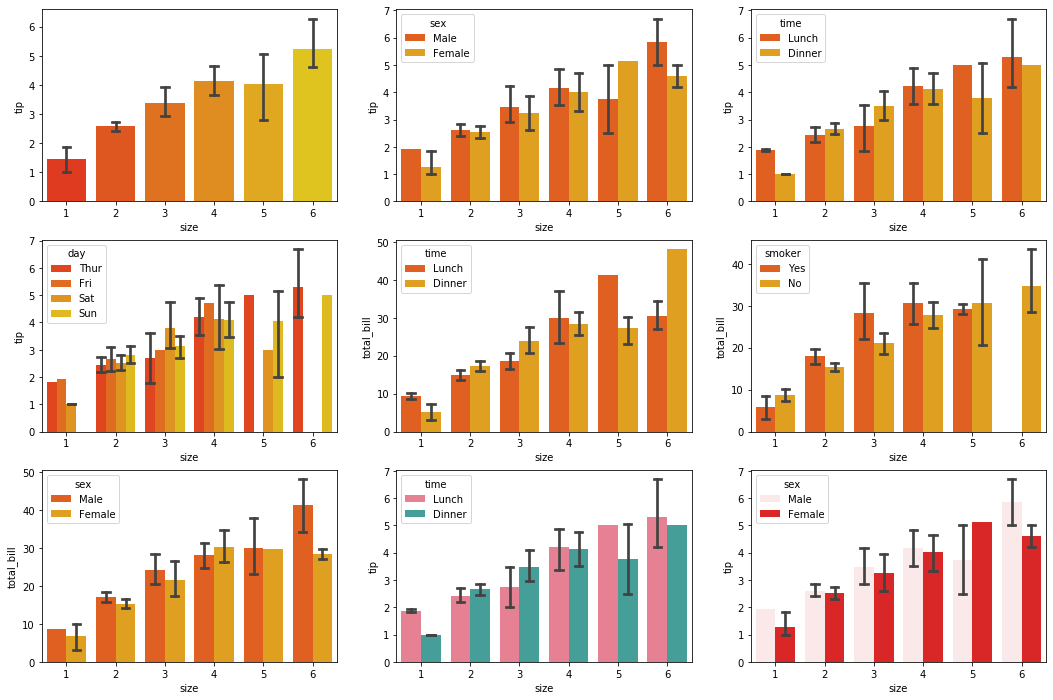

In [11]:
plt.figure(figsize=(18,12))
plt.subplot(3,3,1)
sns.barplot(x='size', y='tip', data=tips, capsize=0.15, palette='autumn')
plt.subplot(3,3,2)
sns.barplot(x='size', y='tip', data=tips, hue="sex",capsize=0.15, palette='autumn')
plt.subplot(3,3,3)
sns.barplot(x='size', y='tip', hue="time",data=tips, capsize=0.15, palette='autumn')
plt.subplot(3,3,4)
sns.barplot(x='size', y='tip', hue="day",data=tips, capsize=0.15, palette='autumn')
plt.subplot(3,3,5)
sns.barplot(x='size', y='total_bill', hue="time",data=tips, capsize=0.15, palette='autumn')
plt.subplot(3,3,6)
sns.barplot(x='size', y='total_bill', hue="smoker",data=tips, capsize=0.15, palette='autumn')
plt.subplot(3,3,7)
sns.barplot(x='size', y='total_bill', hue="sex",data=tips, capsize=0.15, palette='autumn')
plt.subplot(3,3,8)
sns.barplot(x='size', y='tip', hue="time", data=tips, capsize=0.15, palette='husl')
plt.subplot(3,3,9)
sns.barplot(x='size', y='tip', hue="sex", data=tips, capsize=0.15, color='red', saturation=0.7)
plt.show()

### Bar plot using countplot
For Categorical data

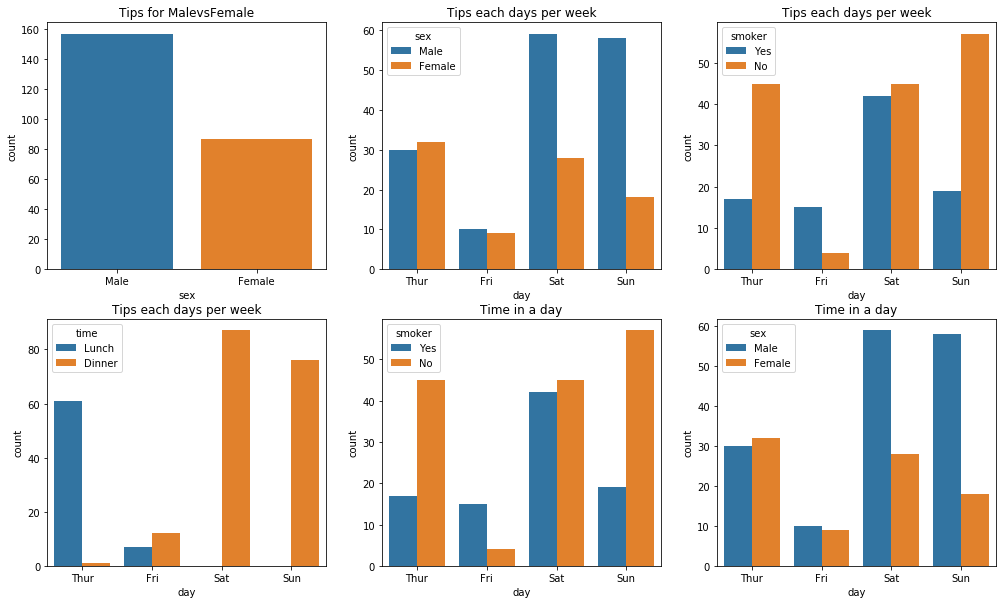

In [12]:
plt.figure(figsize=(17,10))
plt.subplot(2,3,1)
sns.countplot('sex',data=tips)
plt.title('Tips for MalevsFemale')
plt.subplot(2,3,2)
sns.countplot('day',data=tips,hue="sex")
plt.title('Tips each days per week')
plt.subplot(2,3,3)
sns.countplot('day',data=tips,hue="smoker")
plt.title('Tips each days per week')
plt.subplot(2,3,4)
sns.countplot('day',data=tips,hue="time")
plt.title('Tips each days per week')
plt.subplot(2,3,5)
sns.countplot('day',data=tips,hue="smoker")
plt.title('Time in a day')
plt.subplot(2,3,6)
sns.countplot('day',data=tips,hue="sex")
plt.title('Time in a day')
plt.show()

### Stacked Bar plot
https://pstblog.com/2016/10/04/stacked-charts

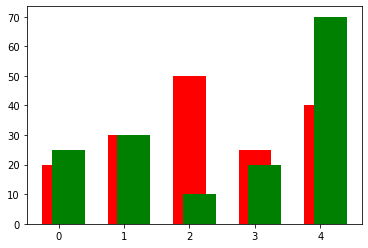

In [35]:
X=np.arange(5)
Y=[20,30,50,25,40]
Z=[25,30,10,20,70]
plt.bar(X+0,Y,color='r',width=0.5)
plt.bar(X+.15,Z,color='g',width=0.5)
plt.show()

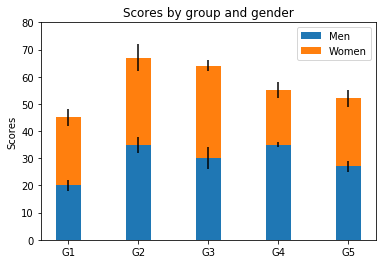

In [42]:
import numpy as np
import matplotlib.pyplot as plt


N = 5
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width, yerr=menStd)
p2 = plt.bar(ind, womenMeans, width,
             bottom=menMeans, yerr=womenStd)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()

In [43]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('ggplot')


data = [[2000, 2000, 2000, 2001, 2001, 2001, 2002, 2002, 2002],
        ['Jan', 'Feb', 'Mar', 'Jan', 'Feb', 'Mar', 'Jan', 'Feb', 'Mar'],
        [1, 2, 3, 4, 5, 6, 7, 8, 9]]

rows = zip(data[0], data[1], data[2])
headers = ['Year', 'Month', 'Value']
df = pd.DataFrame(rows, columns=headers)

df

Year Month  Value
0  2000   Jan      1
1  2000   Feb      2
2  2000   Mar      3
3  2001   Jan      4
4  2001   Feb      5
5  2001   Mar      6
6  2002   Jan      7
7  2002   Feb      8
8  2002   Mar      9

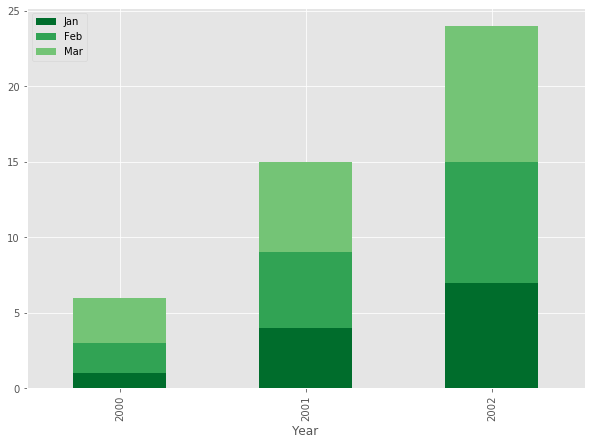

In [44]:
fig, ax = plt.subplots(figsize=(10,7))  

months = df['Month'].drop_duplicates()
margin_bottom = np.zeros(len(df['Year'].drop_duplicates()))
colors = ["#006D2C", "#31A354","#74C476"]

for num, month in enumerate(months):
    values = list(df[df['Month'] == month].loc[:, 'Value'])

    df[df['Month'] == month].plot.bar(x='Year',y='Value', ax=ax, stacked=True, 
                                    bottom = margin_bottom, color=colors[num], label=month)
    margin_bottom += values

plt.show()

In [45]:
# Using Pivot
pivot_df = df.pivot(index='Year', columns='Month', values='Value')
pivot_df

Month  Feb  Jan  Mar
Year                
2000     2    1    3
2001     5    4    6
2002     8    7    9

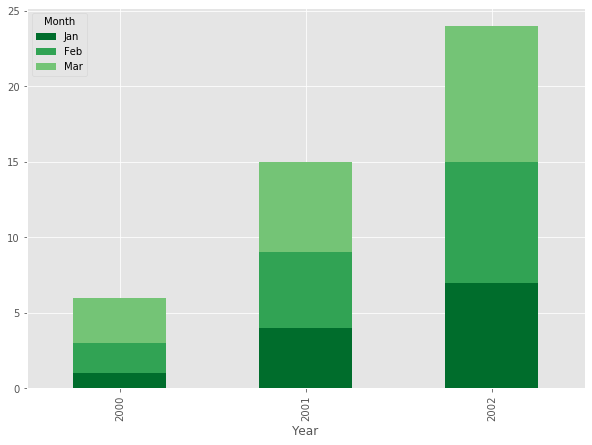

In [46]:
#Note: .loc[:,['Jan','Feb', 'Mar']] is used here to rearrange the layer ordering
pivot_df.loc[:,['Jan','Feb', 'Mar']].plot.bar(stacked=True, color=colors, figsize=(10,7))

In [16]:
from textwrap import wrap
scores = pd.read_csv("scores.csv")
scores.head(5)

School ID                                        School Name    Borough  \
0    02M260                 Clinton School Writers and Artists  Manhattan   
1    06M211  Inwood Early College for Health and Informatio...  Manhattan   
2    01M539  New Explorations into Science, Technology and ...  Manhattan   
3    02M294                               Essex Street Academy  Manhattan   
4    02M308                       Lower Manhattan Arts Academy  Manhattan   

  Building Code        Street Address       City State  Zip Code  Latitude  \
0          M933  425 West 33rd Street  Manhattan    NY     10001  40.75321   
1          M052    650 Academy Street  Manhattan    NY     10002  40.86605   
2          M022   111 Columbia Street  Manhattan    NY     10002  40.71873   
3          M445      350 Grand Street  Manhattan    NY     10002  40.71687   
4          M445      350 Grand Street  Manhattan    NY     10002  40.71687   

   Longitude  ... End Time Student Enrollment Percent White  Percent Black  \
0  -73.99786  ...      NaN                NaN           NaN            NaN   
1  -73.92486  ...  3:00 PM               87.0          3.4%          21.8%   
2  -73.97943  ...  4:00 PM             1735.0         28.6%          13.3%   
3  -73.98953  ...  2:45 PM              358.0         11.7%          38.5%   
4  -73.98953  ...  3:00 PM              383.0          3.1%          28.2%   

  Percent Hispanic Percent Asian Average Score (SAT Math)  \
0              NaN           NaN                      NaN   
1            67.8%          4.6%                      NaN   
2            18.0%         38.5%                    657.0   
3            41.3%          5.9%                    395.0   
4            56.9%          8.6%                    418.0   

  Average Score (SAT Reading)  Average Score (SAT Writing)  Percent Tested  
0                         NaN                          NaN             NaN  
1                         NaN                          NaN             NaN  
2                       601.0                        601.0           91.0%  
3                       411.0                        387.0           78.9%  
4                       428.0                        415.0           65.1%  

[5 rows x 22 columns]

In [17]:
scores.describe()

Zip Code    Latitude   Longitude  Student Enrollment  \
count    435.000000  435.000000  435.000000          428.000000   
mean   10726.096552   40.745472  -73.921072          702.357477   
std      537.927907    0.080937    0.071705          759.176061   
min    10001.000000   40.528230  -74.192150           62.000000   
25%    10301.500000   40.690495  -73.979260          357.250000   
50%    10472.000000   40.741210  -73.925140          466.000000   
75%    11217.000000   40.822095  -73.882580          623.250000   
max    11694.000000   40.888370  -73.726910         5447.000000   

       Average Score (SAT Math)  Average Score (SAT Reading)  \
count                375.000000                   375.000000   
mean                 432.944000                   424.504000   
std                   71.952373                    61.881069   
min                  317.000000                   302.000000   
25%                  386.000000                   386.000000   
50%                  415.000000                   413.000000   
75%                  458.500000                   445.000000   
max                  754.000000                   697.000000   

       Average Score (SAT Writing)  
count                   375.000000  
mean                    418.458667  
std                      64.548599  
min                     284.000000  
25%                     382.000000  
50%                     403.000000  
75%                     437.500000  
max                     693.000000

In [18]:
scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 22 columns):
School ID                      435 non-null object
School Name                    435 non-null object
Borough                        435 non-null object
Building Code                  435 non-null object
Street Address                 435 non-null object
City                           435 non-null object
State                          435 non-null object
Zip Code                       435 non-null int64
Latitude                       435 non-null float64
Longitude                      435 non-null float64
Phone Number                   435 non-null object
Start Time                     431 non-null object
End Time                       431 non-null object
Student Enrollment             428 non-null float64
Percent White                  428 non-null object
Percent Black                  428 non-null object
Percent Hispanic               428 non-null object
Percent Asian             

In [19]:
# Filter the data for plotting
data = scores[:5][['School Name','Average Score (SAT Math)','Average Score (SAT Reading)','Average Score (SAT Writing)']]
data

School Name  \
0                 Clinton School Writers and Artists   
1  Inwood Early College for Health and Informatio...   
2  New Explorations into Science, Technology and ...   
3                               Essex Street Academy   
4                       Lower Manhattan Arts Academy   

   Average Score (SAT Math)  Average Score (SAT Reading)  \
0                       NaN                          NaN   
1                       NaN                          NaN   
2                     657.0                        601.0   
3                     395.0                        411.0   
4                     418.0                        428.0   

   Average Score (SAT Writing)  
0                          NaN  
1                          NaN  
2                        601.0  
3                        387.0  
4                        415.0

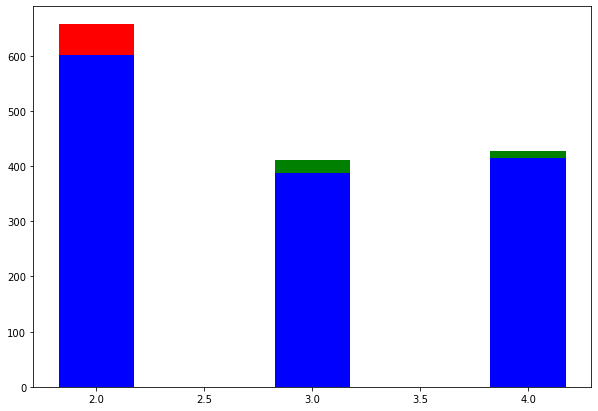

In [38]:
schools = data.iloc[:,0]
barMath = data.iloc[0:,1]
barReading = data.iloc[:,2]
barWriting = data.iloc[:,3]
indx = np.arange(len(data))

plt.figure(figsize=(10,7))
plt.bar(indx, barMath, color='r', width=0.35)
plt.bar(indx, barReading, color='g', width=0.35)
plt.bar(indx, barWriting, color='b', width=0.35)

plt.show()

#### Barplot using value_count()

In [15]:
iris=sns.load_dataset("iris")
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

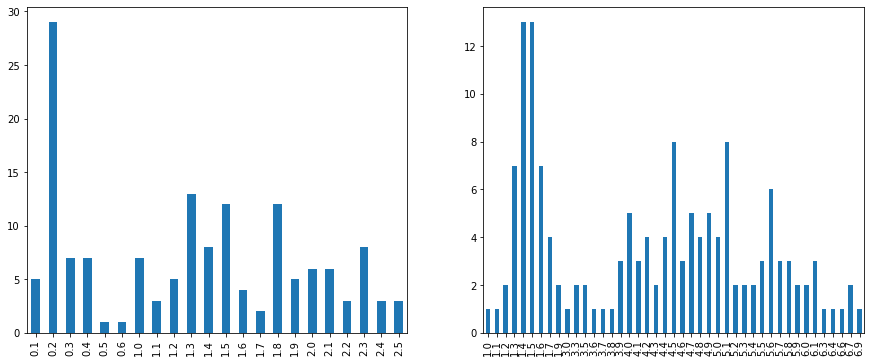

In [16]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
x = iris.petal_width.value_counts()
x = x.sort_index()
x.plot('bar')
plt.subplot(1,2,2)
y = iris.petal_length.value_counts()
y = y.sort_index()
y.plot('bar')
plt.show()

## <center> <a id='2'> Dist plot </a> </center>
- The distribution plot visualizes the distribution of data.
- The distribution plot is suitable for comparing range and distribution for groups of numerical data. The distribution plot is not relevant for detailed analysis of the data as it deals with a summary of the data distribution.

In [17]:
num = np.random.randn(100)

### Dist plot using seaborn - Plots histogram and kde(Kernel Density Estimation) in one plot.

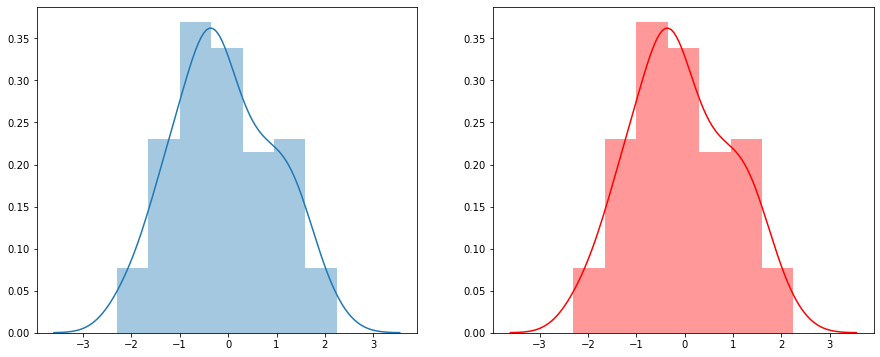

In [18]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(num)
plt.subplot(1,2,2)
sns.distplot(num, color='red')
plt.show()

### Display label of x-axis - Use Pandas Series directly.

In [19]:
label_dist = pd.Series(num, name='variable x')

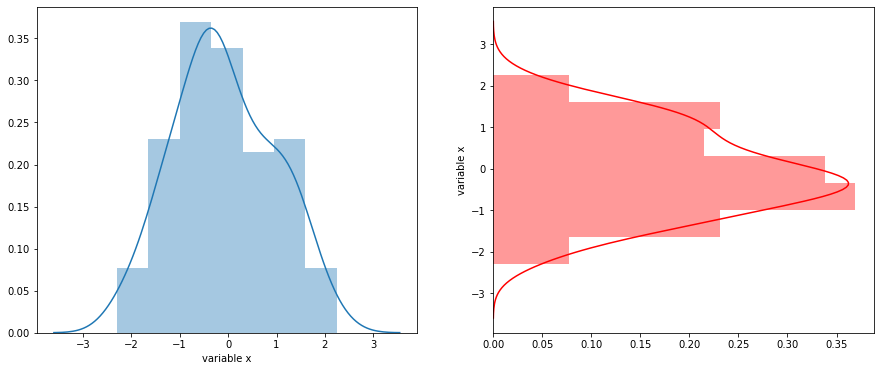

In [20]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(label_dist)
plt.subplot(1,2,2)
sns.distplot(label_dist, vertical=True, color='red')

### Plot only Kernel Density Estimate (KDE)
- Remove histogram plot.
- Use rug to display the distribution of data points at the bottom of the plot

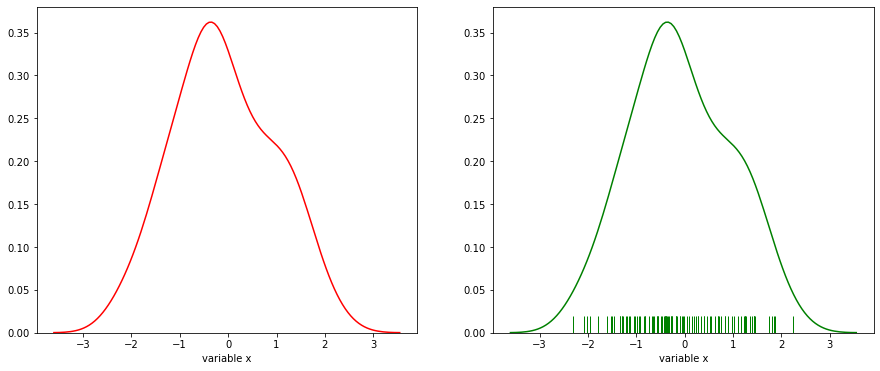

In [21]:
# Define the size of the fihure
plt.figure(figsize=(15,6))
# Univariate Kernel Density Estimate(KDE) plot.
plt.subplot(1,2,1)
sns.distplot(label_dist, hist=False,color="red")
plt.subplot(1,2,2)
sns.distplot(label_dist, rug=True, hist=False, color='green')

#### Displot using a dataset

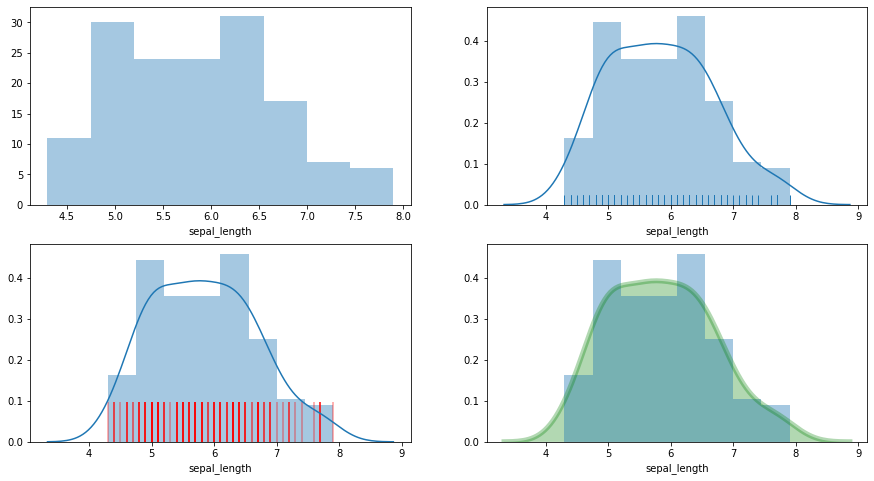

In [22]:
# Import library and dataset
import seaborn as sns
from matplotlib import pyplot as plt
df = sns.load_dataset('iris')
plt.figure(figsize=(15,8))
# Hist only
plt.subplot(2,2,1)
sns.distplot(df["sepal_length"], hist=True, kde=False, rug=False )
# The df["sepal_length"], it can be replaced by "df.sepal_length"

# Hist + Rug + kernel density
plt.subplot(2,2,2)
sns.distplot(df["sepal_length"], hist=True, kde=True, rug=True )
 
# To change parameters of rug
plt.subplot(2,2,3)
sns.distplot(df["sepal_length"], rug=True,
rug_kws={"color": "r", "alpha":0.3, "linewidth": 2, "height":0.2 })
 
# To change parameters of density distribution
plt.subplot(2,2,4)
sns.distplot(df["sepal_length"], kde=True, kde_kws={"color": "g", "alpha":0.3, "linewidth": 5, "shade":True })
plt.show()

## <center> <a id='3'> Box plot </a> </center>
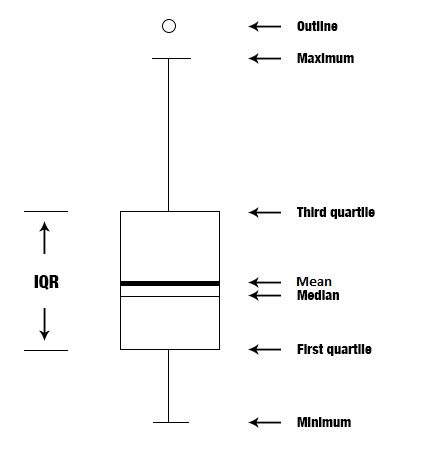

A simple way of representing statistical data on a plot in which a rectangle is drawn to represent the **first** and **third quartiles**, usually with a vertical line inside to indicate the median value. The **first** and **third quartiles** are shown as horizontal lines either side of the rectangle. The outsider lines of the rectangle are called **Whisker**. There is another **horizontal line** beside the line of **mean**.

* Change of numeric variables with respect to the categorical variable
* Only the numerci variable along the x-axis
* **Categorical variable** along the x-axis
* **Numeric variable** along the y-axis

In [23]:
tips = sns.load_dataset('tips')
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [24]:
tips['total_bill'].describe()

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

### Box plot describes the data very well using quaterlies. Easy to find outliers.

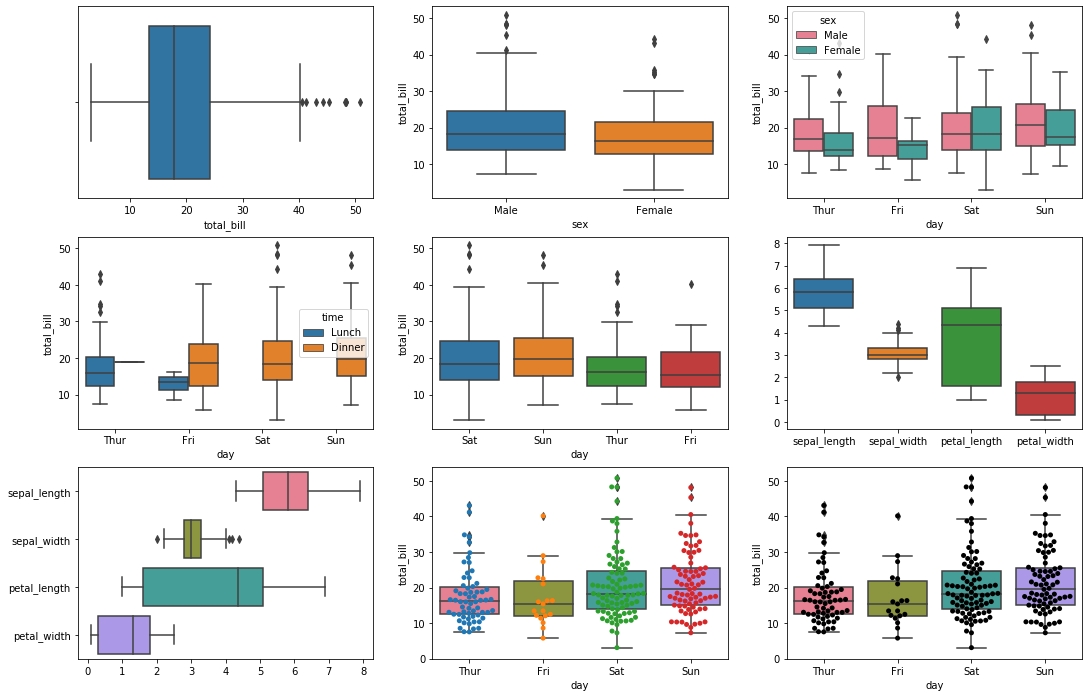

In [25]:
# Define the size of the figure
plt.figure(figsize=(18,12))

# Using the tips dataset
plt.subplot(3,3,1)
sns.boxplot(x=tips['total_bill'])
plt.subplot(3,3,2)
sns.boxplot(x='sex', y='total_bill', data=tips)
plt.subplot(3,3,3)
sns.boxplot(x='day', y='total_bill', hue='sex', data=tips, palette='husl')
plt.subplot(3,3,4)
sns.boxplot(x='day', y='total_bill', data=tips, hue='time')
plt.subplot(3,3,5)
sns.boxplot(x='day', y='total_bill', data=tips, order=['Sat', 'Sun', 'Thur', 'Fri'])
plt.subplot(3,3,6)

# Using the iris datset
iris = sns.load_dataset('iris')
sns.boxplot(data=iris)
plt.subplot(3,3,7)
sns.boxplot(data=iris, orient='horizontal', palette='husl')
plt.subplot(3,3,8)
sns.boxplot(x='day', y='total_bill', data=tips, palette='husl')
sns.swarmplot(x='day', y='total_bill', data=tips)
plt.subplot(3,3,9)
sns.boxplot(x='day', y='total_bill', data=tips, palette='husl')
sns.swarmplot(x='day', y='total_bill', data=tips, color='black')
plt.show()

## <center> <a id='4'> Swarm plot </a> </center>
Draw a categorical scatterplot with non-overlapping points.

This function is similar to stripplot(), but the points are adjusted (only along the categorical axis) so that they don’t overlap. This gives a better representation of the distribution of values, but it does not scale well to large numbers of observations. This style of plot is sometimes called a “beeswarm”.

A swarm plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.

Arranging the points properly requires an accurate transformation between data and point coordinates. This means that non-default axis limits must be set before drawing the plot.

Input data can be passed in a variety of formats, including:

- Vectors of data represented as lists, numpy arrays, or pandas Series objects passed directly to the x, y, and/or hue parameters.

- A “long-form” DataFrame, in which case the x, y, and hue variables will determine how the data are plotted.

- A “wide-form” DataFrame, such that each numeric column will be plotted.

- An array or list of vectors.

In most cases, it is possible to use numpy or Python objects, but pandas objects are preferable because the associated names will be used to annotate the axes. Additionally, you can use Categorical types for the grouping variables to control the order of plot elements.

This function always treats one of the variables as categorical and draws data at ordinal positions (0, 1, … n) on the relevant axis, even when the data has a numeric or date type.

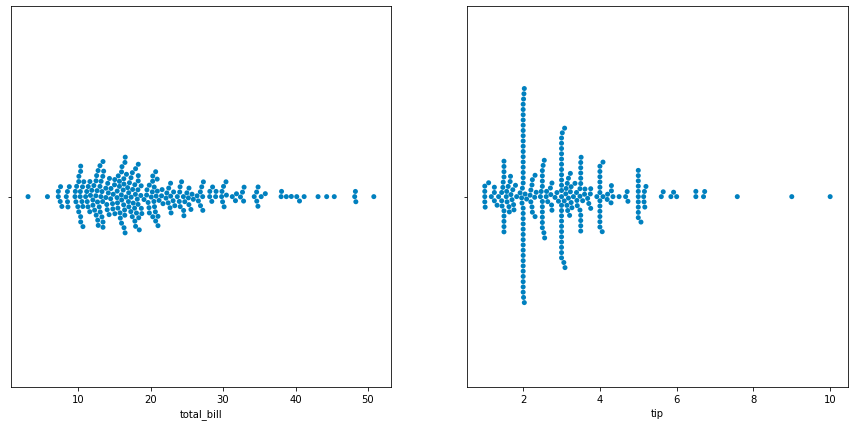

In [26]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.swarmplot(x=tips['total_bill'], data=tips, palette="winter")
plt.subplot(1,2,2)
sns.swarmplot(x=tips['tip'], data=tips, palette="winter")

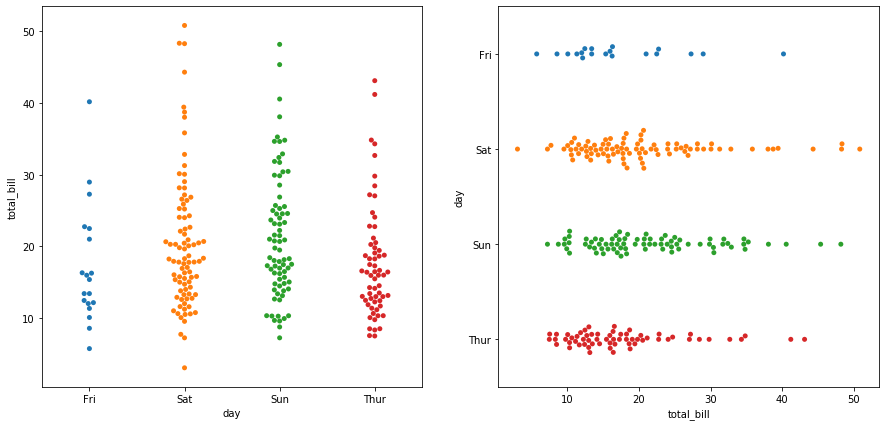

In [27]:
plt.figure(figsize=(15,7))
order=["Fri","Sat","Sun","Thur"]
plt.subplot(1,2,1)
sns.swarmplot(x='day', y='total_bill', data=tips, order=order)
plt.subplot(1,2,2)
sns.swarmplot( x='total_bill',y='day', data=tips, order=order)

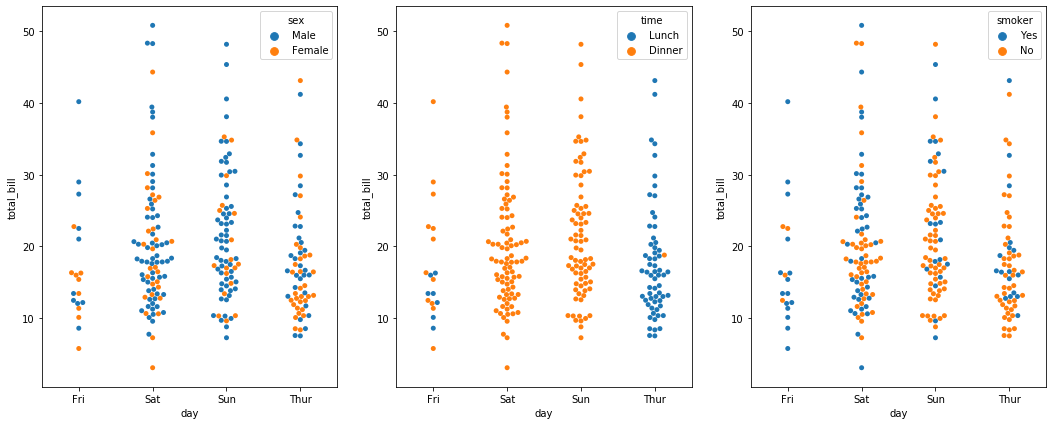

In [28]:
plt.figure(figsize=(18,7))
order=["Fri","Sat","Sun","Thur"]
plt.subplot(1,3,1)
sns.swarmplot(x='day', y='total_bill', hue="sex",data=tips, order=order)
plt.subplot(1,3,2)
sns.swarmplot(x='day', y='total_bill', hue="time",data=tips, order=order)
plt.subplot(1,3,3)
sns.swarmplot(x='day', y='total_bill', hue="smoker",data=tips, order=order)

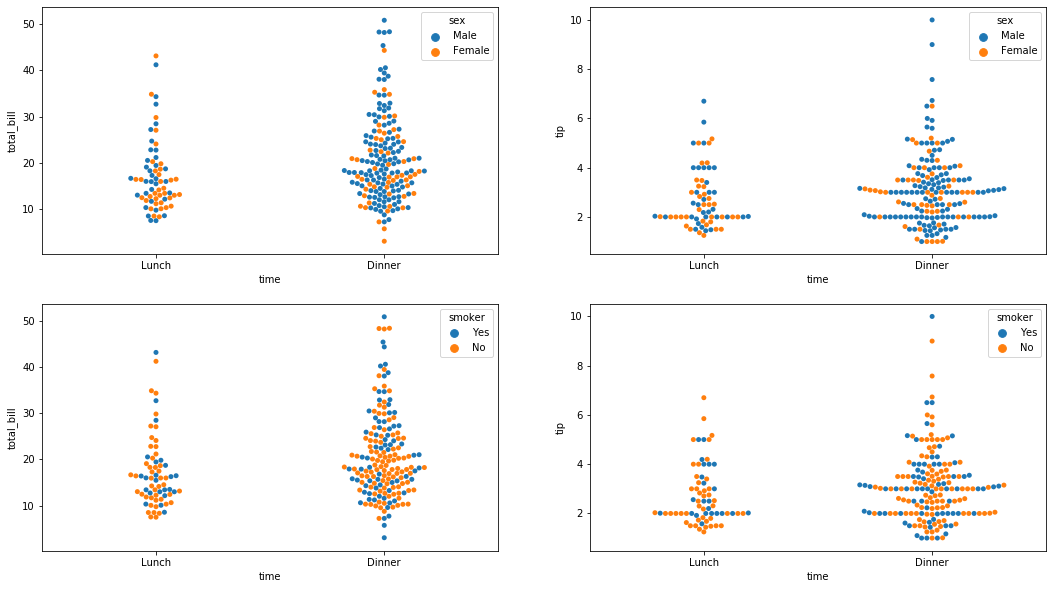

In [29]:
plt.figure(figsize=(18,10))
plt.subplot(2,2,1)
sns.swarmplot(x='time', y='total_bill', hue="sex",data=tips)
plt.subplot(2,2,2)
sns.swarmplot(x='time', y='tip', hue="sex",data=tips)
plt.subplot(2,2,3)
sns.swarmplot(x='time', y='total_bill', hue="smoker",data=tips)
plt.subplot(2,2,4)
sns.swarmplot(x='time', y='tip', hue="smoker",data=tips)

## <center> <a id='5'> Boxen plot </a> </center>

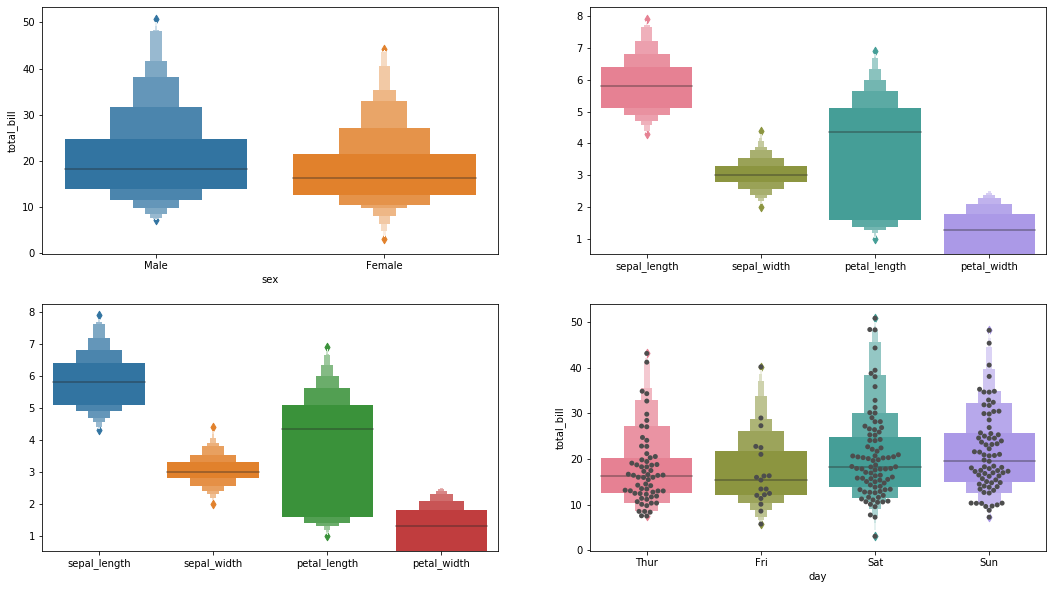

In [30]:
tips = sns.load_dataset('tips')
plt.figure(figsize=(18,10))
plt.subplot(2,2,1)
sns.boxenplot(x='sex', y='total_bill', data=tips)
plt.subplot(2,2,2)
sns.boxenplot(data=iris, orient='vertical', palette='husl')
plt.subplot(2,2,3)
sns.boxenplot(data=iris)
plt.subplot(2,2,4)
sns.boxenplot(x='day', y='total_bill', data=tips, palette='husl')
sns.swarmplot(x='day', y='total_bill', data=tips, color='0.3')

## <center> <a id='6'> Strip plot </a> </center>

Draw a scatterplot where one variable is **categorical**.

A strip plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.

Input data can be passed in a variety of formats, including:

- Vectors of data represented as lists, numpy arrays, or pandas Series objects passed directly to the x, y, and/or hue parameters.

- A “long-form” DataFrame, in which case the x, y, and hue variables will determine how the data are plotted.

- A “wide-form” DataFrame, such that each numeric column will be plotted.

- An array or list of vectors.

In most cases, it is possible to use numpy or Python objects, but pandas objects are preferable because the associated names will be used to annotate the axes. Additionally, you can use Categorical types for the grouping variables to control the order of plot elements.

This function always treats one of the variables as categorical and draws data at ordinal positions (0, 1, … n) on the relevant axis, even when the data has a numeric or date type.

- A strip plot is a graphical data anlysis technique for summarizing a univariate data set. 
- The strip plot consists of: Horizontal axis = the value of the response variable.
- It is typically used for small data sets (histograms and density plots are typically preferred for larger data sets).
- using jitter

In [31]:
tips=sns.load_dataset('tips')

In [32]:
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

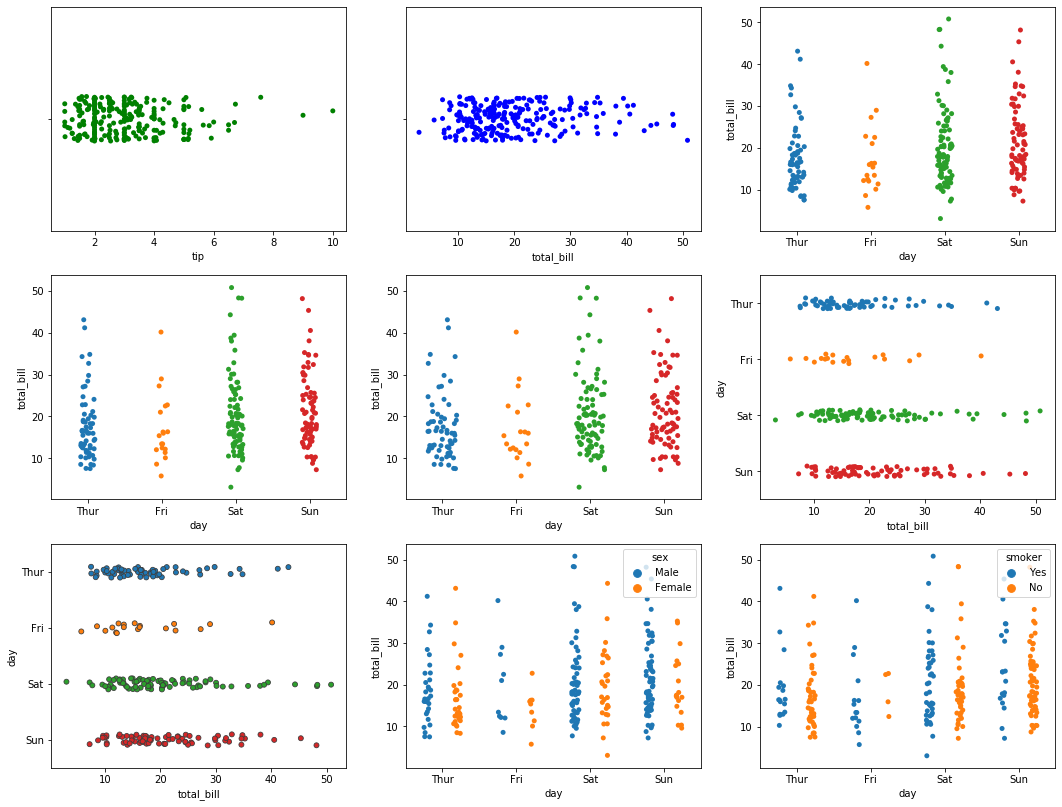

In [33]:
plt.figure(figsize=(18,14))
plt.subplot(3,3,1)
sns.stripplot(x=tips['tip'], color='green')
plt.subplot(3,3,2)
sns.stripplot(x=tips['total_bill'], color='blue')
plt.subplot(3,3,3)
sns.stripplot(x='day', y='total_bill', data=tips)
plt.subplot(3,3,4)
sns.stripplot(x='day', y='total_bill', data=tips, jitter=True)
plt.subplot(3,3,5)
sns.stripplot(x='day', y='total_bill', data=tips, jitter=0.2)
plt.subplot(3,3,6)
sns.stripplot(x='total_bill', y='day', data=tips, jitter=True)
plt.subplot(3,3,7)
sns.stripplot(x='total_bill', y='day', data=tips, linewidth=0.8, jitter=True)
plt.subplot(3,3,8)
sns.stripplot(x='day', y='total_bill', data=tips, hue='sex', jitter=True, split=True)
plt.subplot(3,3,9)
sns.stripplot(x='day', y='total_bill', data=tips, hue='smoker', jitter=True, split=True)

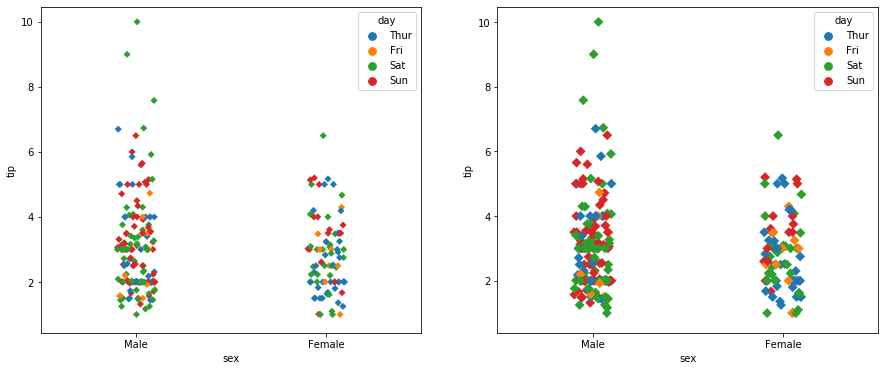

In [34]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.stripplot(x='sex', y='tip', hue='day', data=tips, marker='D', jitter=True)
plt.subplot(1,2,2)
sns.stripplot(x='sex', y='tip', hue='day', data=tips, marker='D', jitter=True, size=7)

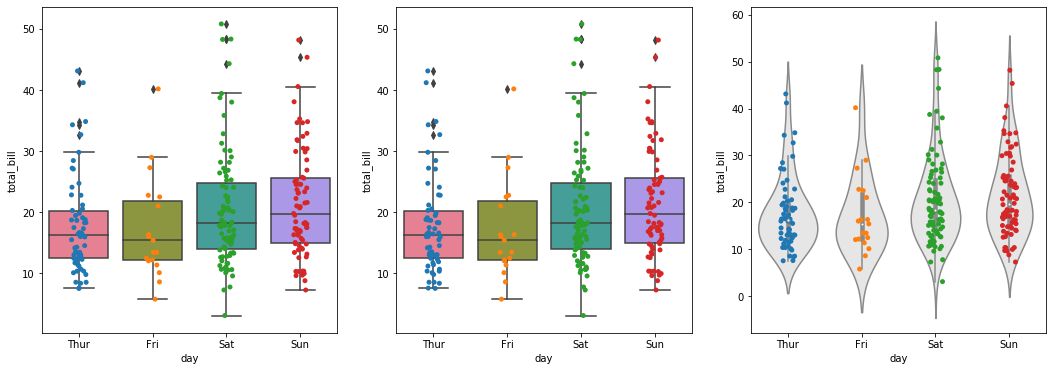

In [35]:
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
sns.boxplot(x='day', y='total_bill', data=tips, palette='husl')
sns.stripplot(x='day', y='total_bill', data=tips)
plt.subplot(1,3,2)
sns.boxplot(x='day', y='total_bill', data=tips, palette='husl')
sns.stripplot(x='day', y='total_bill', data=tips, jitter=True)
plt.subplot(1,3,3)
sns.stripplot(x='day', y='total_bill', data=tips, jitter=True)
sns.violinplot(x='day', y='total_bill', data=tips, color='0.9')

## <center> <a id='7'> PairGrid plot </a>  </center>
- PairGrid allows us to draw a grid of subplots using the same plot type to visualize data. 
- Unlike FacetGrid, it uses different pair of variable for each subplot. 
- It forms a matrix of sub-plots. It is also sometimes called as “scatterplot matrix”.

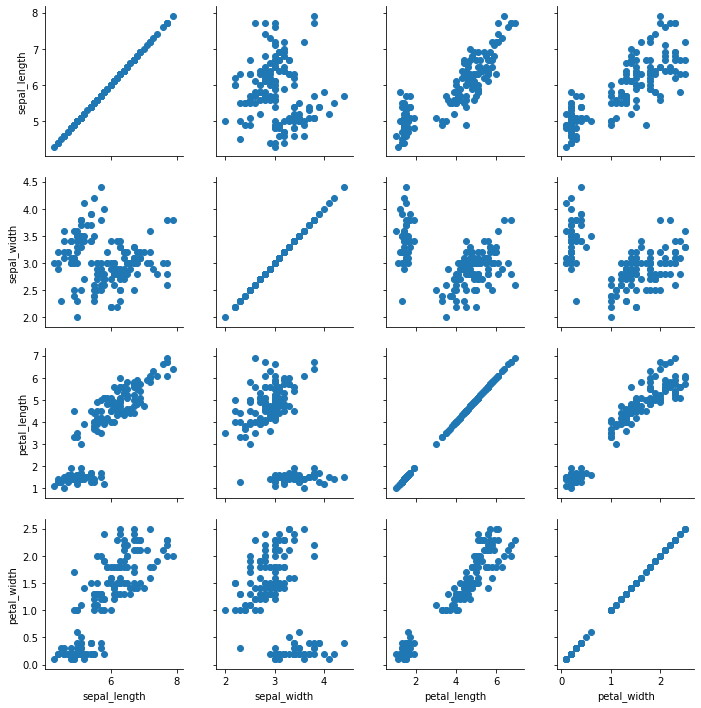

In [36]:
iris = sns.load_dataset('iris')
x = sns.PairGrid(iris)
x = x.map(plt.scatter)

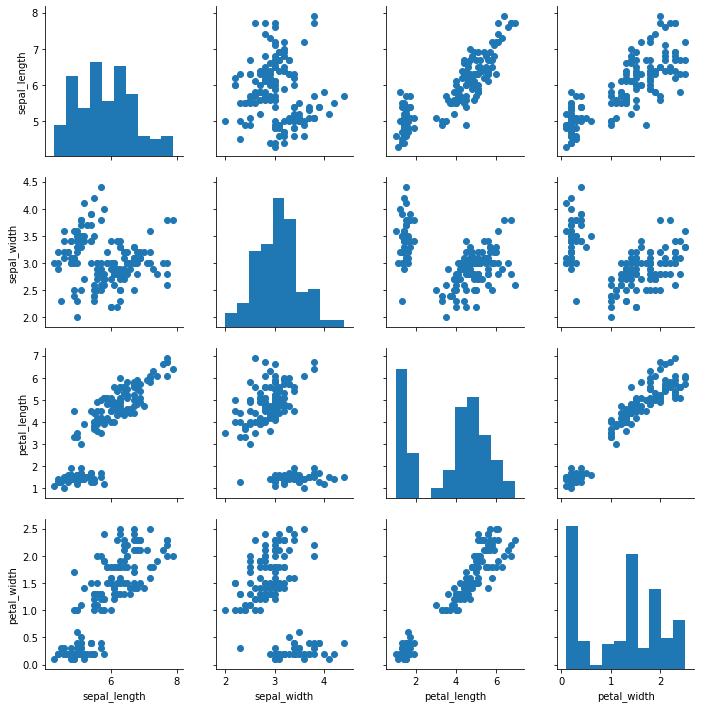

In [37]:
x = sns.PairGrid(iris)
x = x.map_diag(plt.hist)
x = x.map_offdiag(plt.scatter)

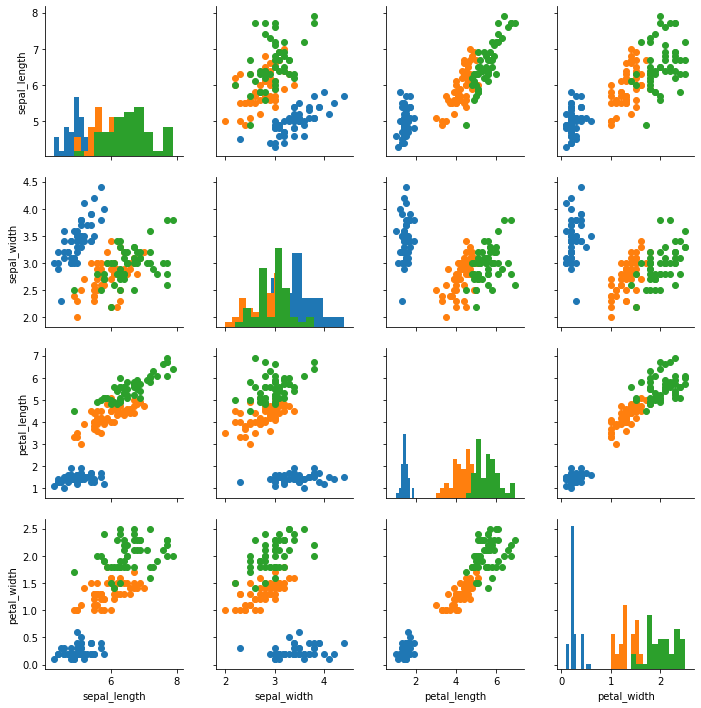

In [38]:
x = sns.PairGrid(iris, hue='species')
x = x.map_diag(plt.hist)
x = x.map_offdiag(plt.scatter)

In [39]:
iris.species.value_counts()

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

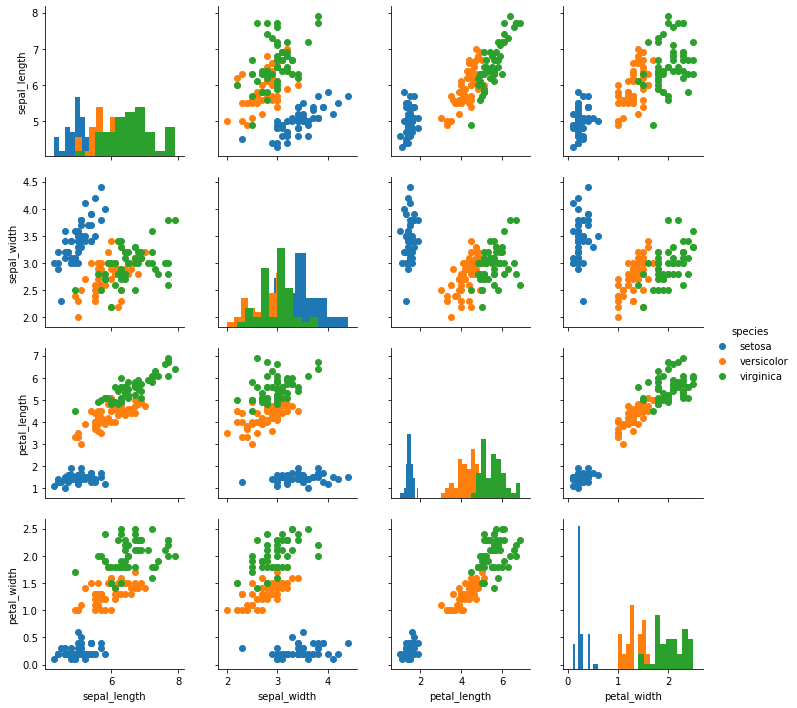

In [40]:
x = sns.PairGrid(iris, hue='species')
x = x.map_diag(plt.hist)
x = x.map_offdiag(plt.scatter)
x.add_legend()

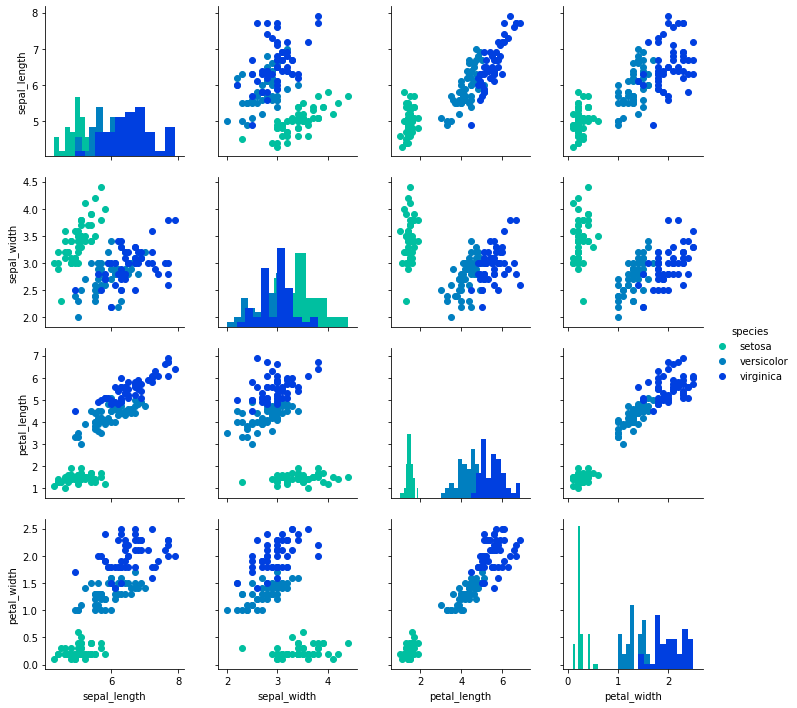

In [41]:
x = sns.PairGrid(iris, hue='species', palette='winter_r') # coolwarm, husl, winter_r, RdBu.
x = x.map_diag(plt.hist)
x = x.map_offdiag(plt.scatter)
x.add_legend()

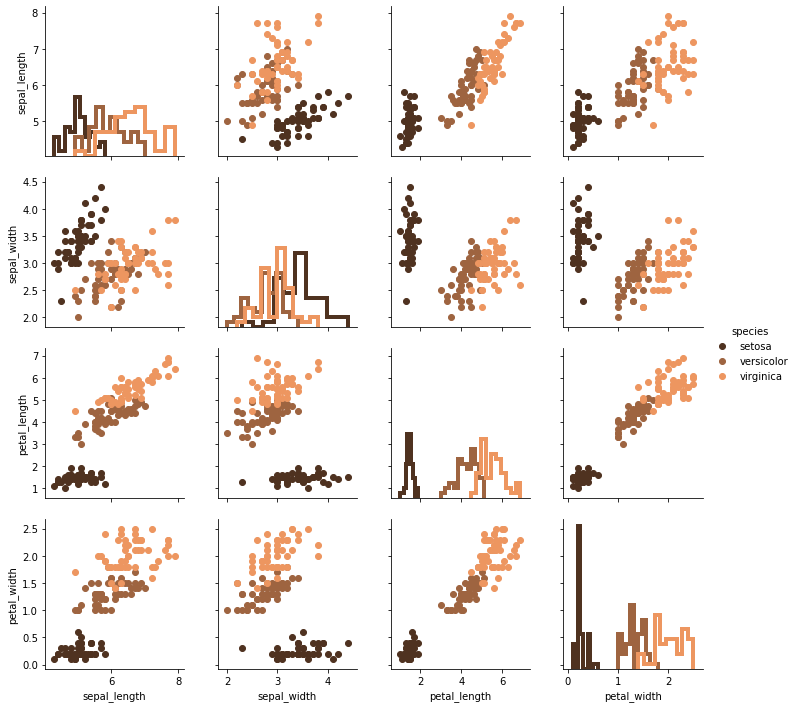

In [42]:
x = sns.PairGrid(iris, hue='species', palette='copper') # autumn, coolwarm, husl, winter_r, RdBu.
x = x.map_diag(plt.hist, histtype='step', linewidth=4)
x = x.map_offdiag(plt.scatter)
x.add_legend()

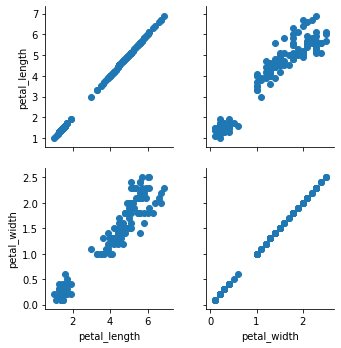

In [43]:
x = sns.PairGrid(iris, vars=['petal_length', 'petal_width'])
x = x.map(plt.scatter)

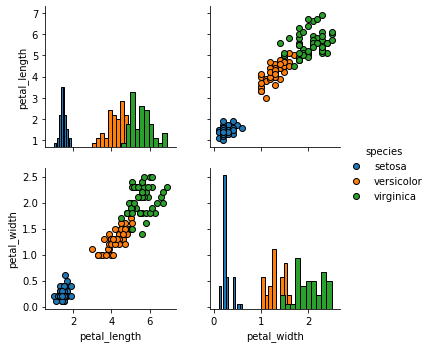

In [44]:
x = sns.PairGrid(iris, hue='species', vars=['petal_length', 'petal_width'])
x = x.map_diag(plt.hist, edgecolor='black')
x = x.map_offdiag(plt.scatter, edgecolor='black')
x = x.add_legend()

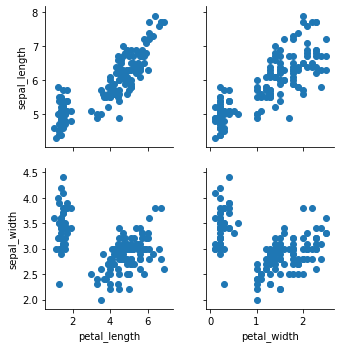

In [45]:
x = sns.PairGrid(iris, x_vars=['petal_length', 'petal_width'],
                y_vars=['sepal_length', 'sepal_width'])
x = x.map(plt.scatter)

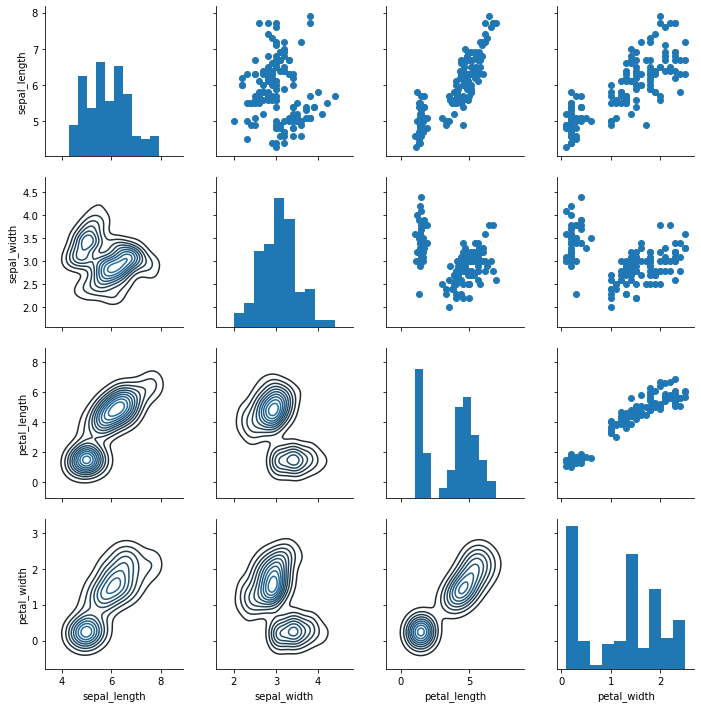

In [46]:
x = sns.PairGrid(iris)
x = x.map_diag(plt.hist)
x = x.map_upper(plt.scatter)
x = x.map_lower(sns.kdeplot)

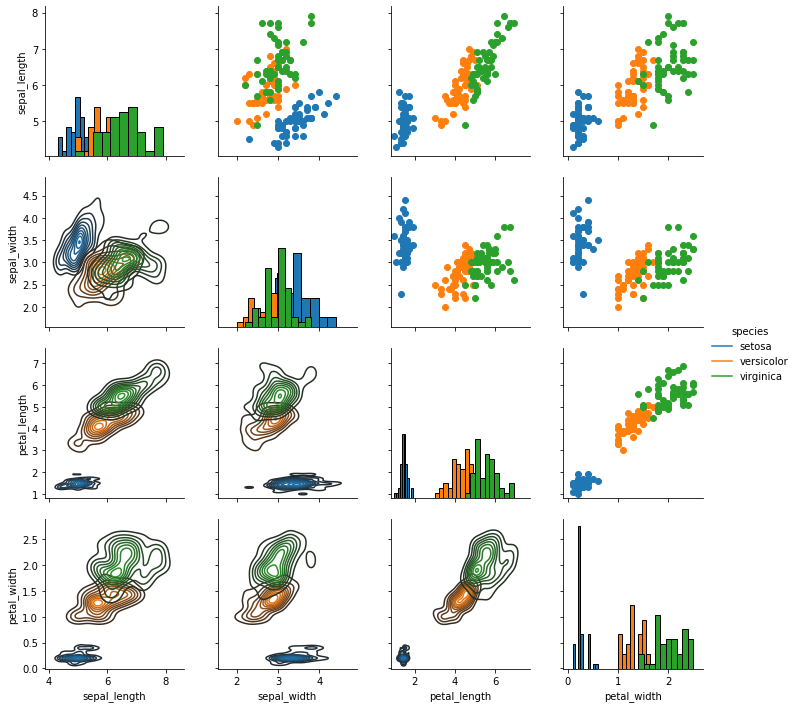

In [47]:
x = sns.PairGrid(iris, hue='species')
x = x.map_diag(plt.hist, edgecolor='black')
x = x.map_upper(plt.scatter)
x = x.map_lower(sns.kdeplot)
x = x.add_legend()

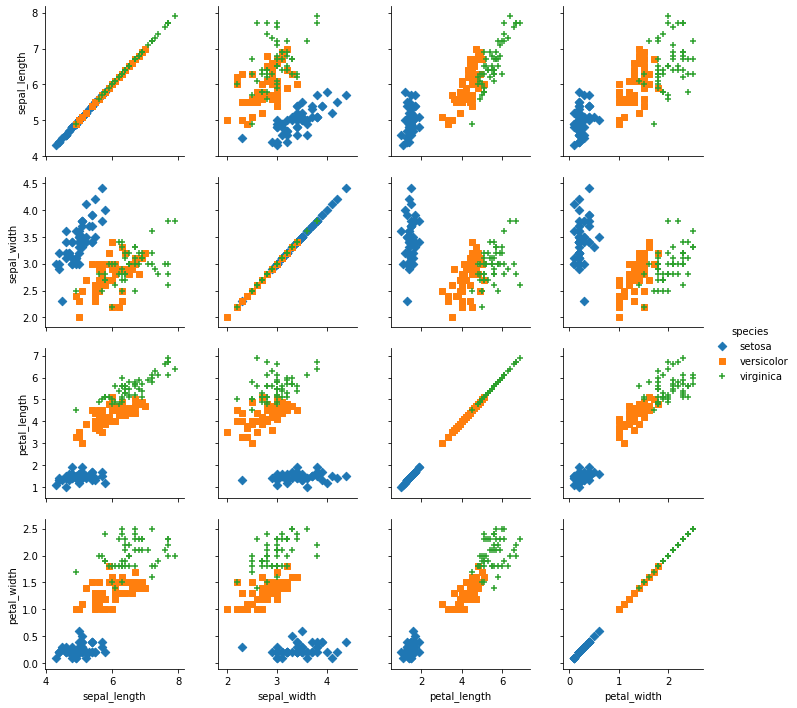

In [48]:
x = sns.PairGrid(iris, hue='species', hue_kws={'marker': ['D', 's', '+']})
x = x.map(plt.scatter)
x = x.add_legend()

## <center> <a id='8'> Violin plot </a> </center>
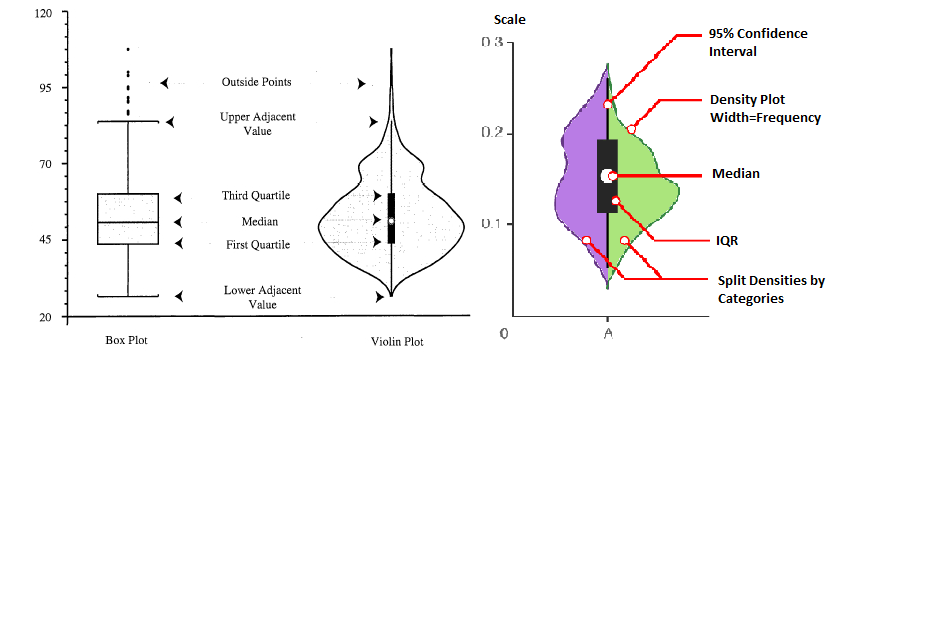
- A violin plot is a method of plotting numeric data. It is similar to a box plot with a rotated kernel density plot on each side.
- A violin plot has four layers. The outer shape represents all possible results, with thickness indicating how common.
- The next layer inside represents the values that occur 95% of the time.

In [49]:
tips = sns.load_dataset('tips')
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

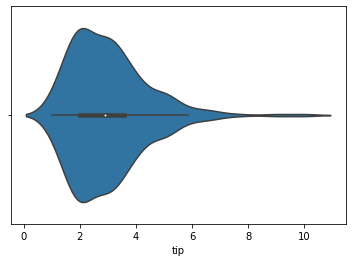

In [50]:
sns.violinplot(x=tips['tip'])

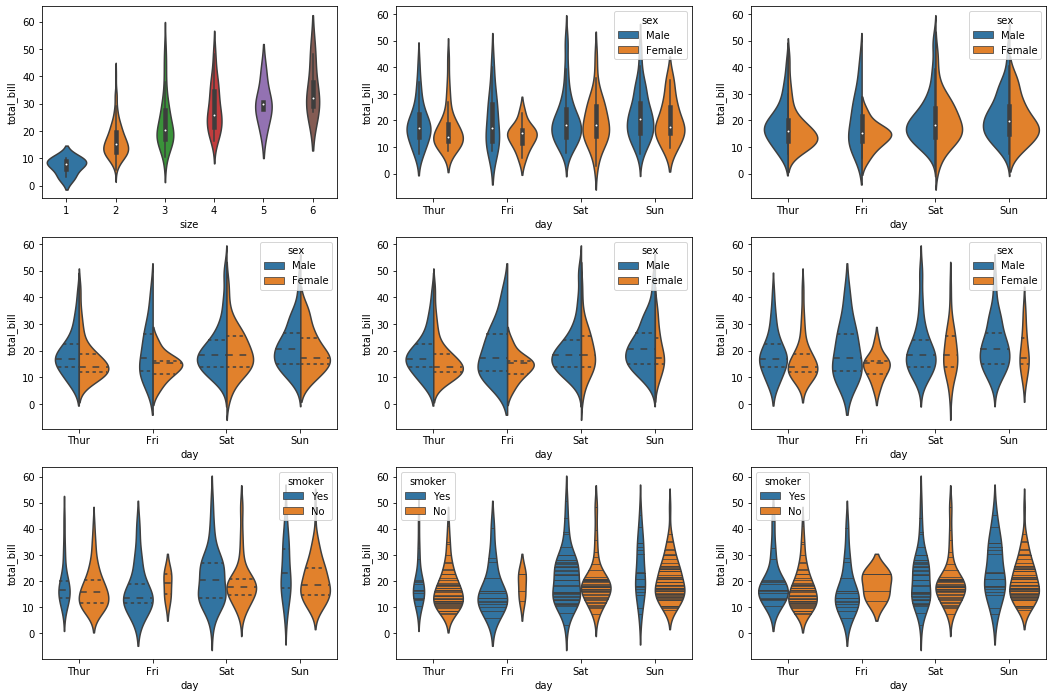

In [51]:
plt.figure(figsize=(18,12))
plt.subplot(3,3,1)
sns.violinplot(x='size', y='total_bill', data=tips)
plt.subplot(3,3,2)
sns.violinplot(x='day', y='total_bill', hue='sex', data=tips)
plt.subplot(3,3,3)
sns.violinplot(x='day', y='total_bill', hue='sex', data=tips, split=True)
plt.subplot(3,3,4)
sns.violinplot(x='day', y='total_bill', hue='sex', data=tips, split=True, inner='quartile')
plt.subplot(3,3,5)
sns.violinplot(x='day', y='total_bill', hue='sex', data=tips, split=True, inner='quartile', scale='count')
plt.subplot(3,3,6)
sns.violinplot(x='day', y='total_bill', hue='sex', data=tips, inner='quartile', scale='count')
plt.subplot(3,3,7)
sns.violinplot(x='day', y='total_bill', hue='smoker', data=tips, inner='quartile', scale='count')
plt.subplot(3,3,8)
sns.violinplot(x='day', y='total_bill', hue='smoker', data=tips, inner='stick', scale='count')
plt.subplot(3,3,9)
sns.violinplot(x='day', y='total_bill', hue='smoker', data=tips, inner='stick')

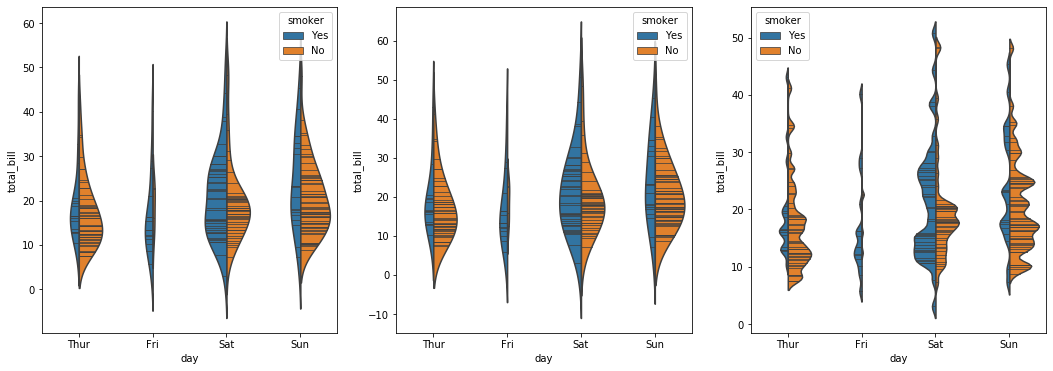

In [52]:
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
# Here, we can compare the number of customers on different days by width of violin plot.
sns.violinplot(x='day', y='total_bill', hue='smoker', data=tips, 
               inner='stick', scale='count', scale_hue=False, split=True)
plt.subplot(1,3,2)
sns.violinplot(x='day', y='total_bill', hue='smoker', data=tips, 
               inner='stick', scale='count', scale_hue=False, split=True, bw=0.7)
plt.subplot(1,3,3)
sns.violinplot(x='day', y='total_bill', hue='smoker', data=tips, 
               inner='stick', scale='count', scale_hue=False, split=True, bw=0.1)

## <center> <a id='9'> Point plot </a> </center>

Draw a set of vertical point plots grouped by a categorical variable:
For more deatils, study the cheatsheet of seaborn point plot from https://seaborn.pydata.org/generated/seaborn.pointplot.html

Input data can be passed in a variety of formats, including:
- Vectors of data represented as lists, numpy arrays, or pandas Series objects passed directly to the x, y, and/or hue parameters.
- A “long-form” DataFrame, in which case the x, y, and hue variables will determine how the data are plotted.
- A “wide-form” DataFrame, such that each numeric column will be plotted.
- An array or list of vectors.

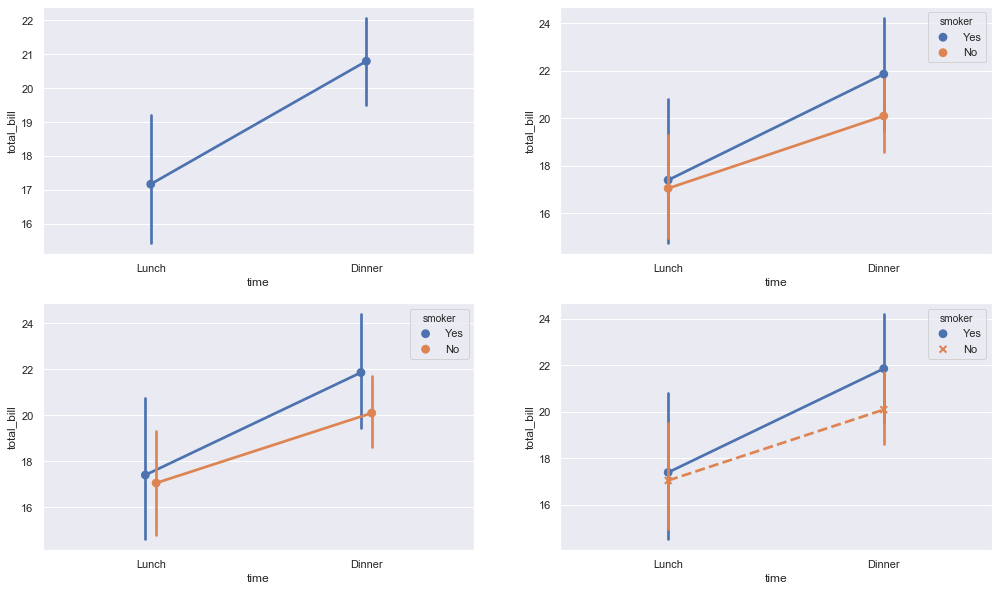

In [53]:
import seaborn as sns
sns.set(style="darkgrid")
tips = sns.load_dataset("tips")
plt.figure(figsize=(17,10))
plt.subplot(2,2,1)
ax = sns.pointplot(x="time", y="total_bill", data=tips)
plt.subplot(2,2,2)
ax = sns.pointplot(x="time", y="total_bill", hue="smoker", data=tips)
plt.subplot(2,2,3)
ax = sns.pointplot(x="time", y="total_bill", hue="smoker", data=tips, dodge=True)
plt.subplot(2,2,4)
ax = sns.pointplot(x="time", y="total_bill", hue="smoker", data=tips, markers=["o", "x"], linestyles=["-", "--"])

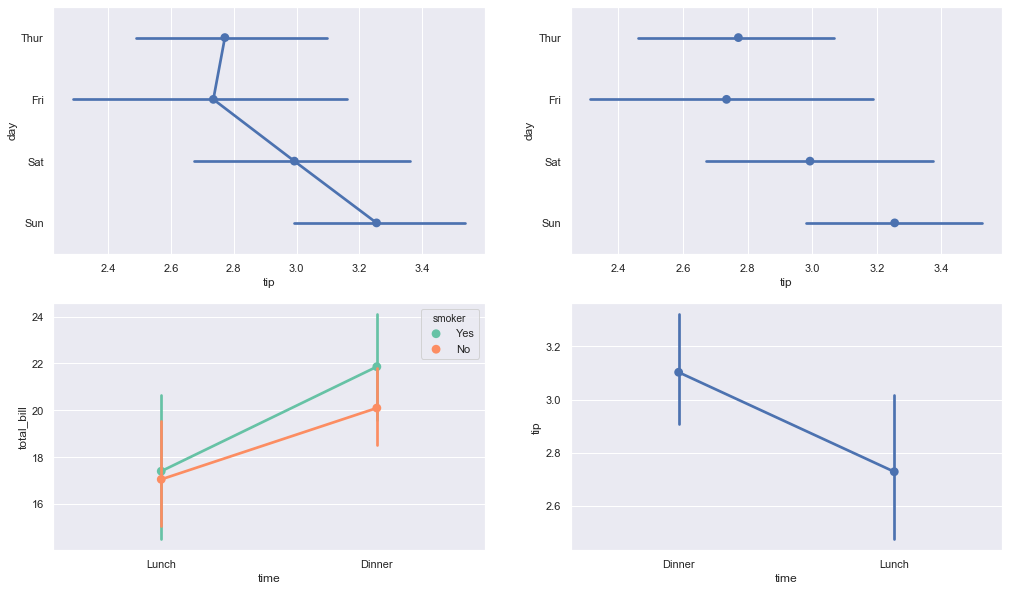

In [54]:
plt.figure(figsize=(17,10))
plt.subplot(2,2,1)
ax = sns.pointplot(x="tip", y="day", data=tips)
plt.subplot(2,2,2)
ax = sns.pointplot(x="tip", y="day", data=tips, join=False)
plt.subplot(2,2,3)
ax = sns.pointplot(x="time", y="total_bill", hue="smoker", data=tips, palette="Set2")
plt.subplot(2,2,4)
ax = sns.pointplot(x="time", y="tip", data=tips, order=["Dinner", "Lunch"])

### Use median and Standard deviation

- Use median as the estimator
- Use Confidence interval (ci)
- Use Standard deviation (std)
- Use Capsize

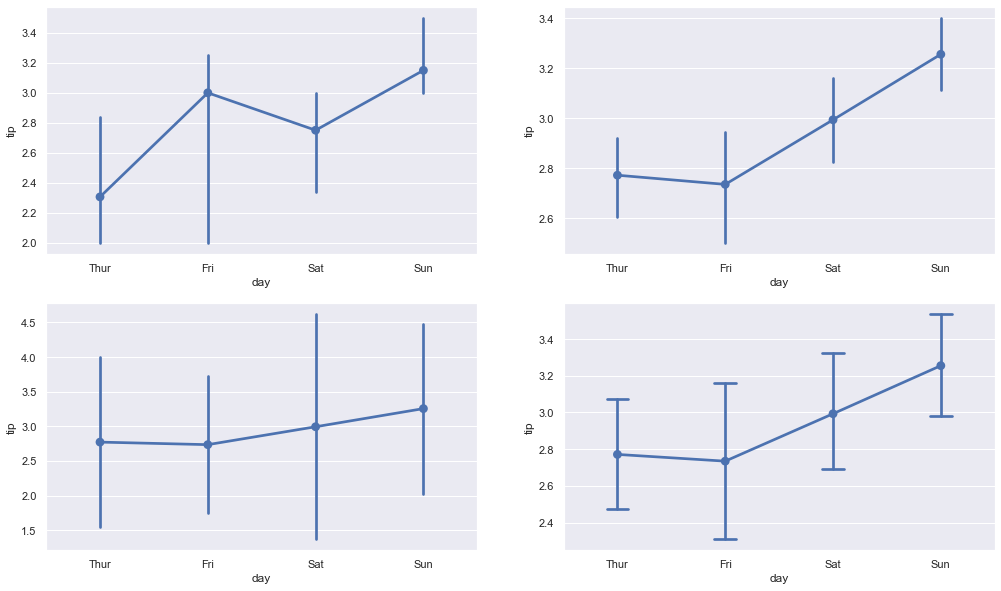

In [55]:
from numpy import median
plt.figure(figsize=(17,10))
plt.subplot(2,2,1)
ax = sns.pointplot(x="day", y="tip", data=tips, estimator=median)
plt.subplot(2,2,2)
ax = sns.pointplot(x="day", y="tip", data=tips, ci=68)
plt.subplot(2,2,3)
ax = sns.pointplot(x="day", y="tip", data=tips, ci="sd")
plt.subplot(2,2,4)
ax = sns.pointplot(x="day", y="tip", data=tips, capsize=.2)

### Point plot using Catplot
Use **catplot()** to combine a **pointplot()** and a **FacetGrid**. This allows grouping within additional categorical variables. Using **catplot()** is safer than using **FacetGrid** directly, as it ensures synchronization of variable order across facets:

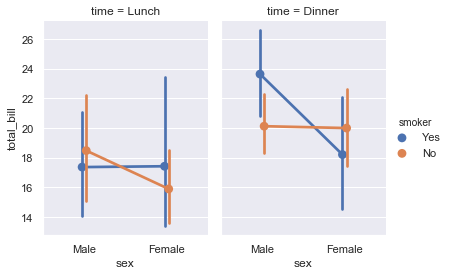

In [56]:
g = sns.catplot(x="sex", y="total_bill",hue="smoker", col="time",data=tips, kind="point",dodge=True, height=4, aspect=.7);

## <center> <a id='10'> Clustermap plot </a> </center>
- Plots a matrix dataset as a hierarchically-clustered heatmap.

In [57]:
flights = sns.load_dataset('flights')
flights.head()

year     month  passengers
0  1949   January         112
1  1949  February         118
2  1949     March         132
3  1949     April         129
4  1949       May         121

In [58]:
flights = flights.pivot('month', 'year', 'passengers')
flights

year       1949  1950  1951  1952  1953  1954  1955  1956  1957  1958  1959  \
month                                                                         
January     112   115   145   171   196   204   242   284   315   340   360   
February    118   126   150   180   196   188   233   277   301   318   342   
March       132   141   178   193   236   235   267   317   356   362   406   
April       129   135   163   181   235   227   269   313   348   348   396   
May         121   125   172   183   229   234   270   318   355   363   420   
June        135   149   178   218   243   264   315   374   422   435   472   
July        148   170   199   230   264   302   364   413   465   491   548   
August      148   170   199   242   272   293   347   405   467   505   559   
September   136   158   184   209   237   259   312   355   404   404   463   
October     119   133   162   191   211   229   274   306   347   359   407   
November    104   114   146   172   180   203   237   271   305   310   362   
December    118   140   166   194   201   229   278   306   336   337   405   

year       1960  
month            
January     417  
February    391  
March       419  
April       461  
May         472  
June        535  
July        622  
August      606  
September   508  
October     461  
November    390  
December    432

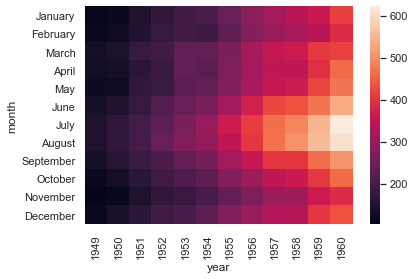

In [59]:
from matplotlib.colors import ListedColormap
sns.heatmap(flights)

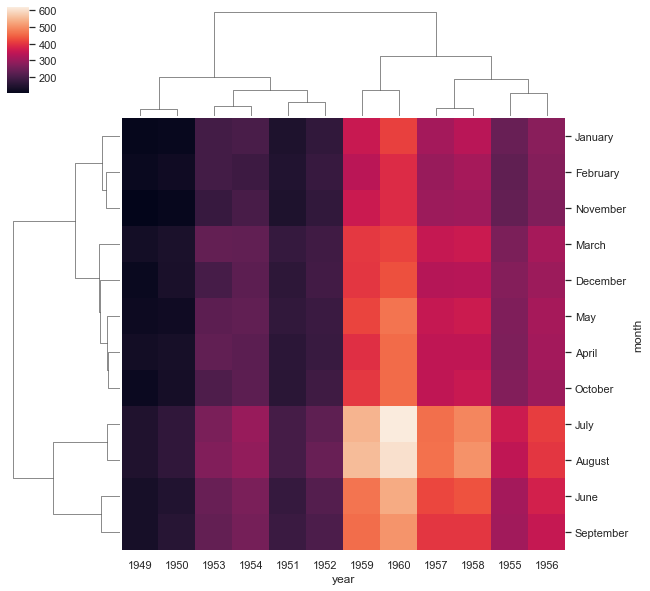

In [60]:
sns.clustermap(flights)

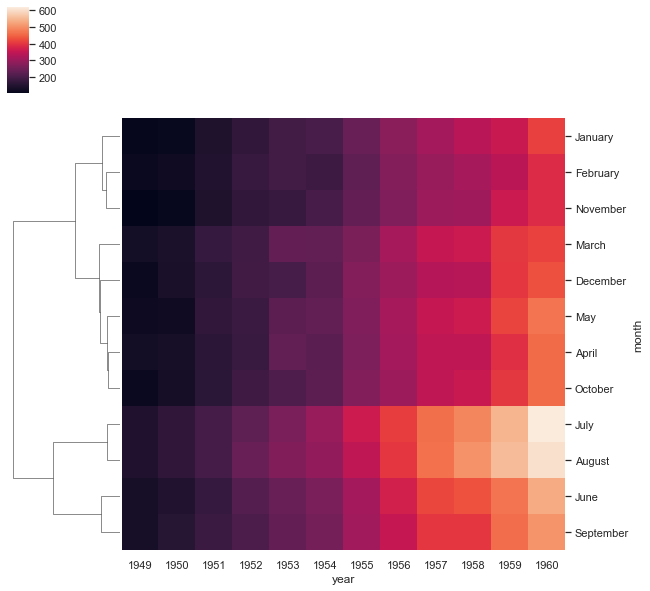

In [61]:
sns.clustermap(flights, col_cluster=False)

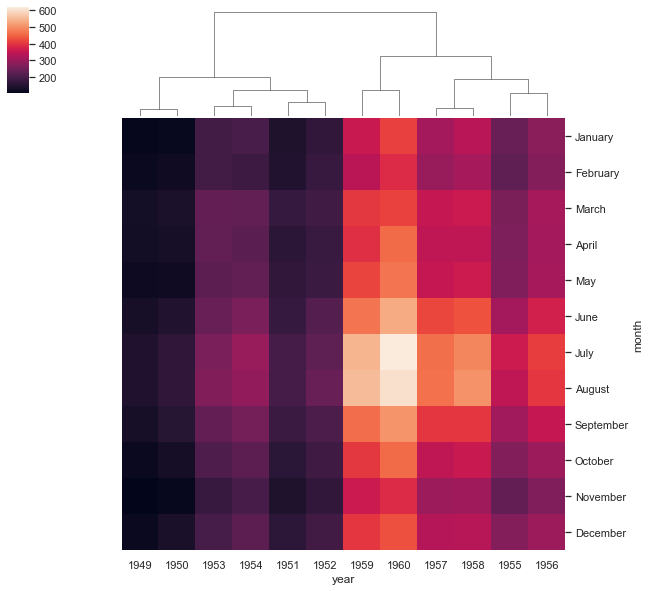

In [62]:
sns.clustermap(flights, row_cluster=False)

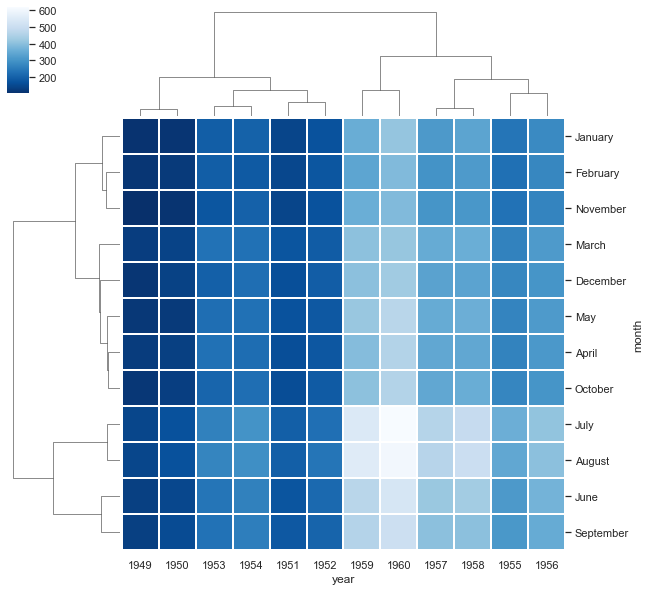

In [63]:
sns.clustermap(flights, cmap='Blues_r', linewidth=1) # coolwarm, Blues_r

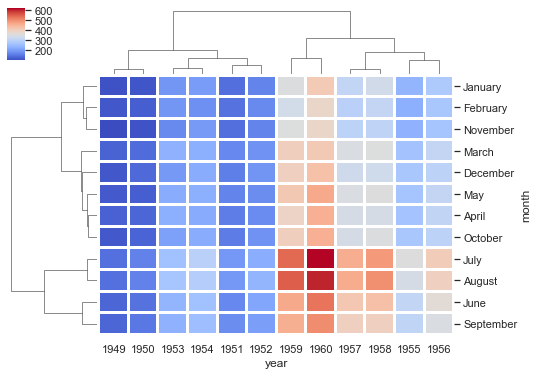

In [64]:
sns.clustermap(flights, cmap='coolwarm', linewidth=2, figsize=(8,6))

### Standardize across col or rows = 0/1 = rows/columns

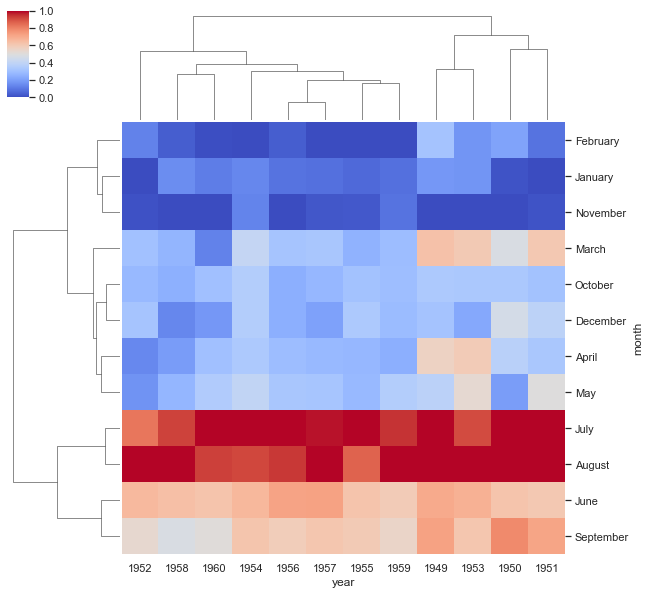

In [65]:
sns.clustermap(flights, cmap='coolwarm', standard_scale=1) # 1 - columns

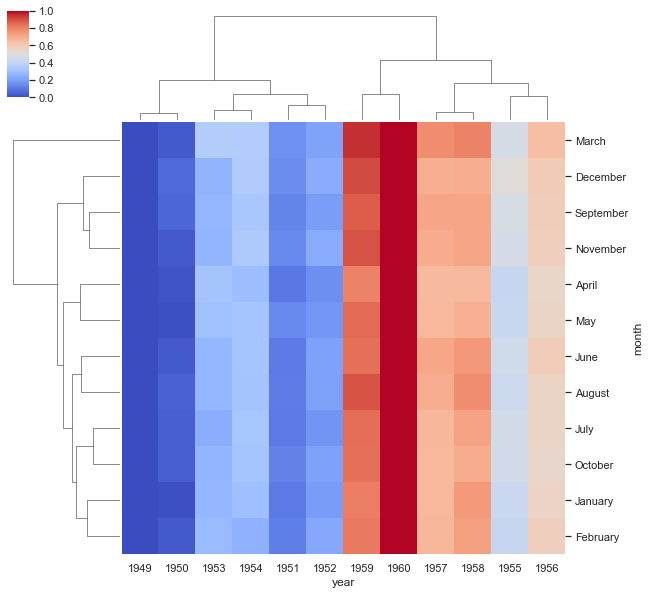

In [66]:
sns.clustermap(flights, cmap='coolwarm', standard_scale=0) # 0 - rows

### Normalize our dataset = z_score = 0/1 = rows/columns

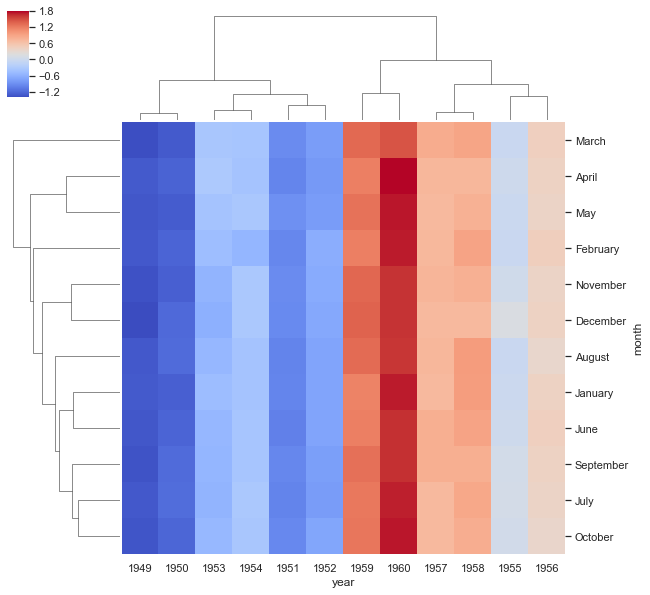

In [67]:
sns.clustermap(flights, cmap='coolwarm', z_score=0) # 0 - rows

### Clustermap using iris dataset

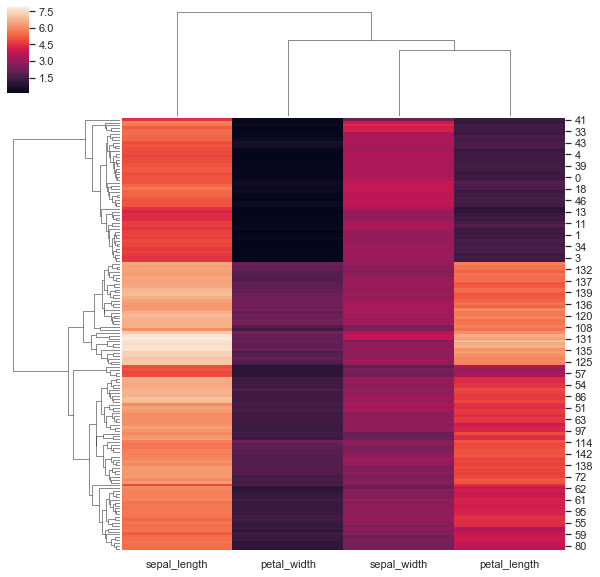

In [68]:
import seaborn as sns; sns.set(color_codes=True)
iris = sns.load_dataset("iris")
species = iris.pop("species")
g = sns.clustermap(iris)

Change color level

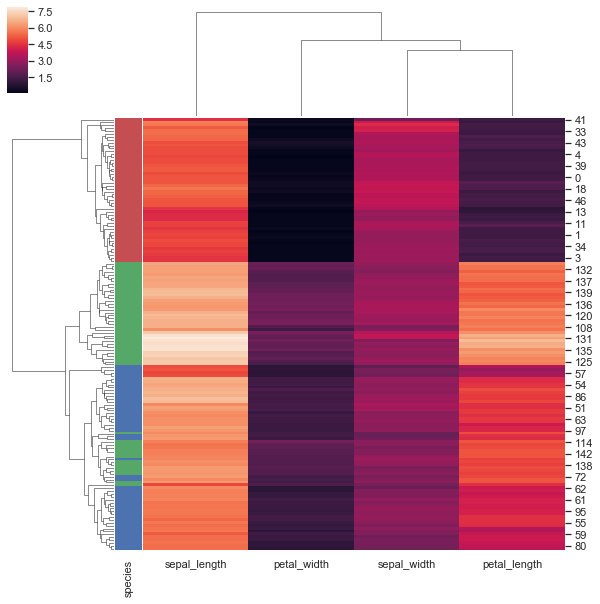

In [71]:
lut = dict(zip(species.unique(), "rbg"))
row_colors = species.map(lut)
g = sns.clustermap(iris, row_colors=row_colors)

Use different colormap and adjust the limits of the color range:

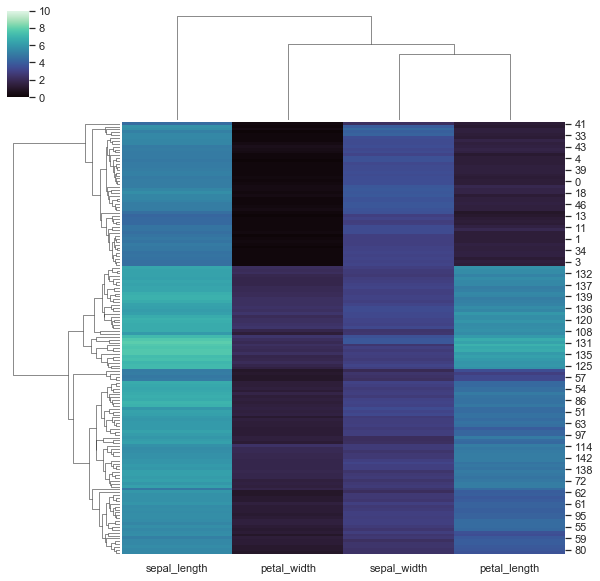

In [72]:
g = sns.clustermap(iris, cmap="mako", vmin=0, vmax=10)

Use a differnt similarity metric

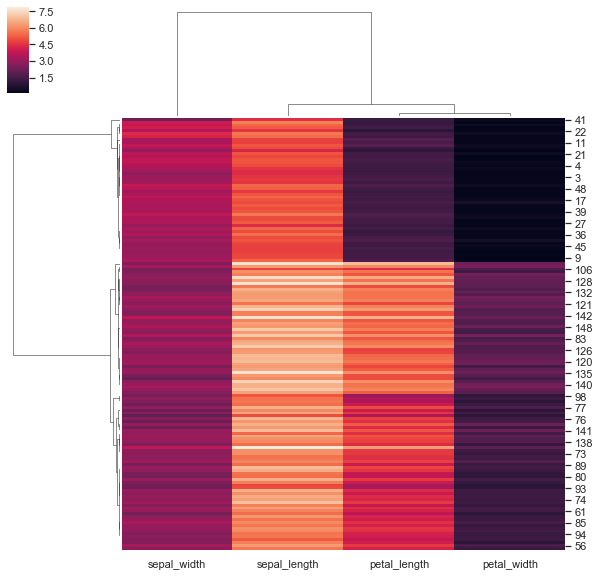

In [73]:
g = sns.clustermap(iris, metric="correlation")

Use a different clustering method:

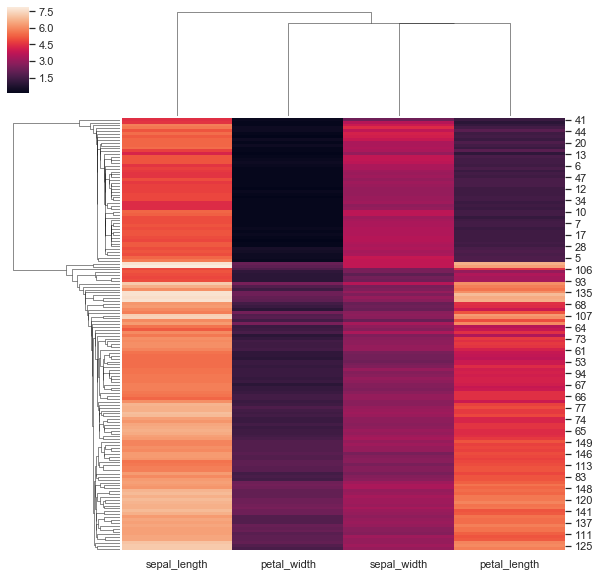

In [74]:
g = sns.clustermap(iris, method="single")

Standardize the data with the columns

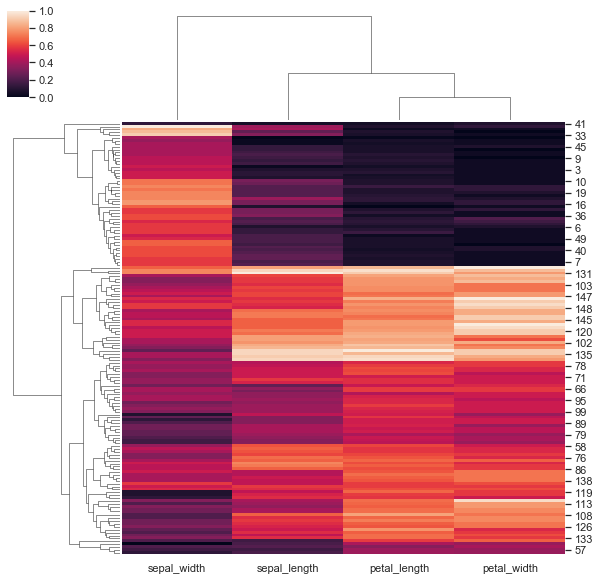

In [75]:
g = sns.clustermap(iris, standard_scale=1)

Normalize the data within the rows

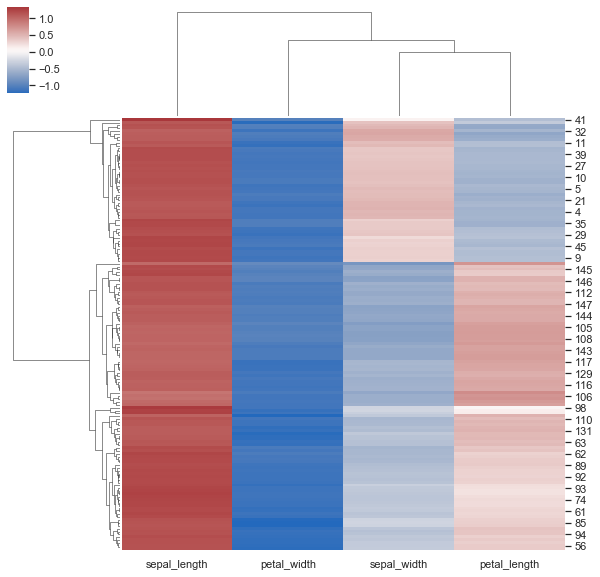

In [76]:
g = sns.clustermap(iris, z_score=0, cmap="vlag")

## <center> <a id='11'> Heatmap plot </a> </center>
- A heat map is a graphical representation of data where the individual values contained in a matrix are represented as colors. 
- It is a bit like looking a data table from above. It is really useful to display a general view of numerical data, not to.

In [78]:
normal = np.random.rand(12, 15)

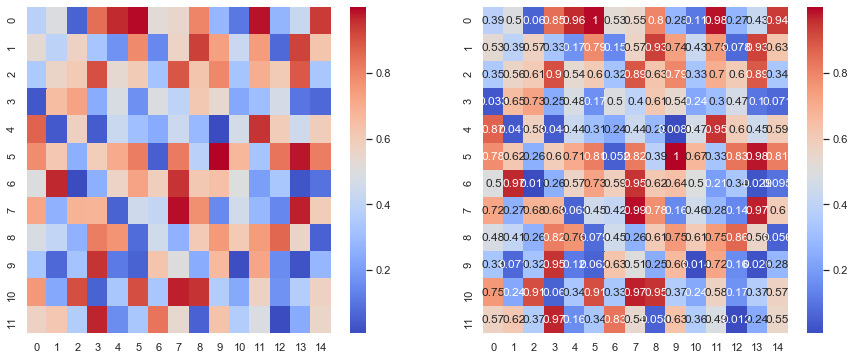

In [79]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.heatmap(normal, cmap='coolwarm')
plt.subplot(1,2,2)
sns.heatmap(normal, annot=True, cmap='coolwarm')

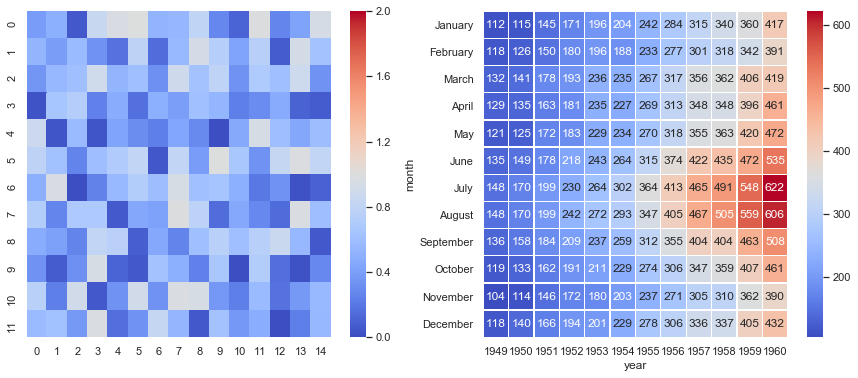

In [80]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.heatmap(normal, vmin=0, vmax=2, cmap='coolwarm')
plt.subplot(1,2,2)
sns.heatmap(flights, cmap='coolwarm', annot=True, fmt='d', linewidths=0.3)

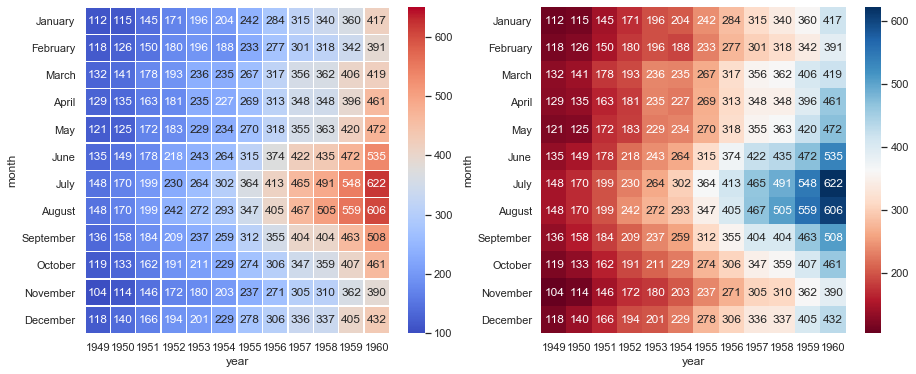

In [81]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.heatmap(flights, cmap='coolwarm', annot=True, fmt='d', 
            linewidths=0.3, vmin=100, vmax=650)
plt.subplot(1,2,2)
sns.heatmap(flights, cmap='RdBu', annot=True, fmt='d') 

### Center the map at a value

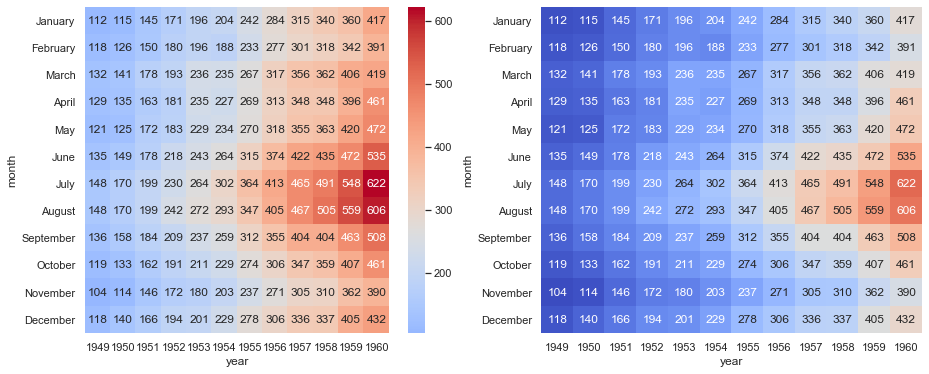

In [82]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.heatmap(flights, center=flights.loc['June'][1954], annot=True, 
            fmt='d', cmap='coolwarm')
plt.subplot(1,2,2)
sns.heatmap(flights, center=flights.loc['March'][1959], annot=True, 
            fmt='d', cmap='coolwarm', cbar=False)

## <center> <a id='12'> FacetGrid plot </a></center>

In [2]:
tips = sns.load_dataset('tips')
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

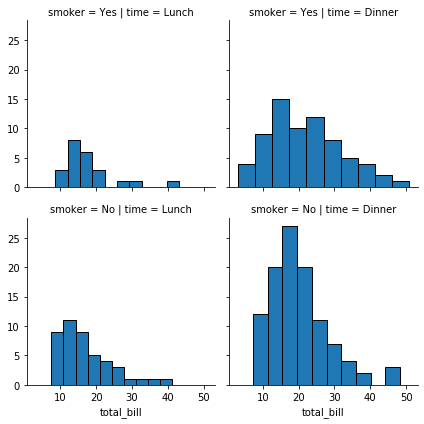

In [3]:
x = sns.FacetGrid(row='smoker', col='time', data=tips)
x = x.map(plt.hist, 'total_bill', edgecolor='black')

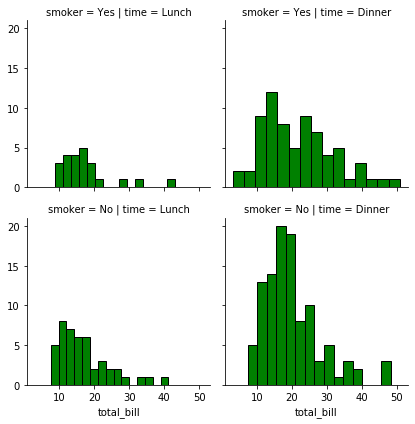

In [4]:
x = sns.FacetGrid(row='smoker', col='time', data=tips)
x = x.map(plt.hist, 'total_bill', edgecolor='black', color='green', 
          bins=15)

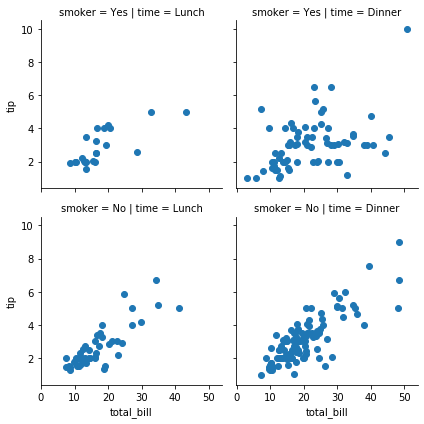

In [5]:
x = sns.FacetGrid(row='smoker', col='time', data=tips)
x = x.map(plt.scatter, 'total_bill', 'tip')

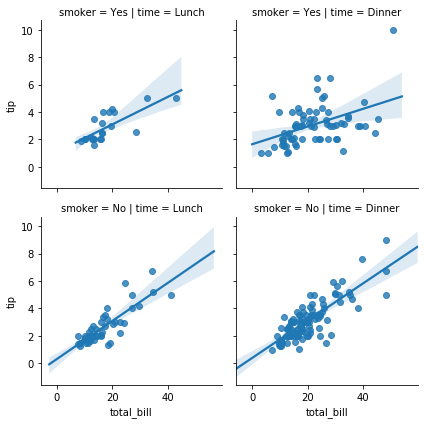

In [6]:
x = sns.FacetGrid(row='smoker', col='time', data=tips)
x = x.map(sns.regplot, 'total_bill', 'tip')

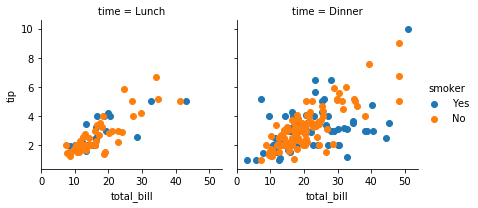

In [7]:
x = sns.FacetGrid(tips, col='time', hue='smoker')
x = x.map(plt.scatter, 'total_bill', 'tip')
x = x.add_legend()

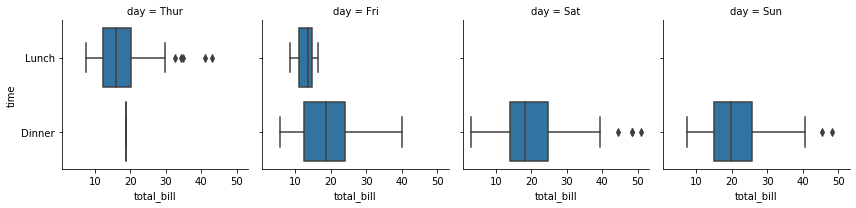

In [8]:
x = sns.FacetGrid(tips, col='day')
x = x.map(sns.boxplot, 'total_bill', 'time')

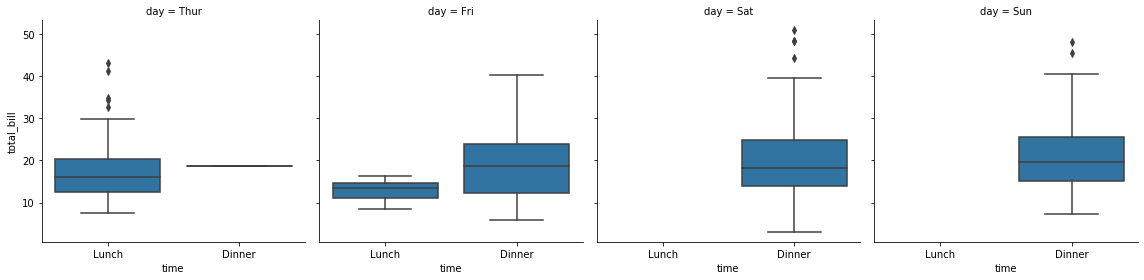

In [9]:
x = sns.FacetGrid(tips, col='day', size=4, aspect=1)
x = x.map(sns.boxplot, 'time', 'total_bill')

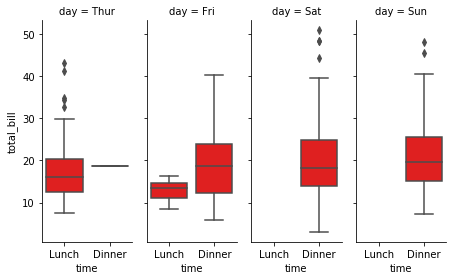

In [10]:
x = sns.FacetGrid(tips, col='day', col_order=['Thur', 'Fri', 'Sat', 'Sun'], 
                  size=4, aspect=0.4)
x = x.map(sns.boxplot, 'time', 'total_bill', color='red')

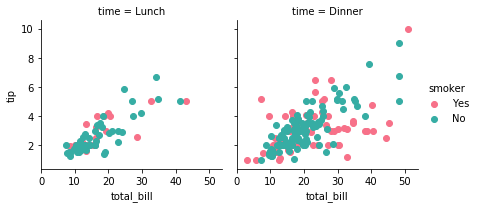

In [11]:
x = sns.FacetGrid(tips, col='time', hue='smoker', palette='husl')
x = x.map(plt.scatter, 'total_bill', 'tip')
x = x.add_legend()

## <center> <a id='13'> Joint plot </a> </center>
- Plot different plots in the same plot.

In [12]:
tips = sns.load_dataset('tips')
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [13]:
iris = sns.load_dataset('iris')
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

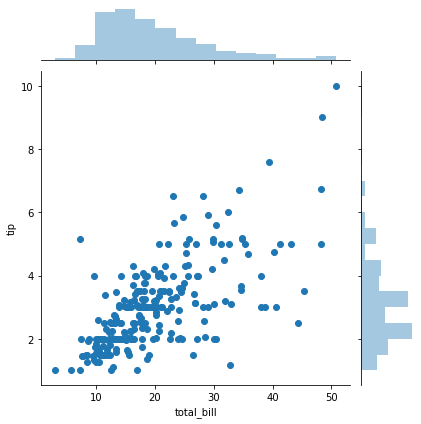

In [14]:
sns.jointplot(x='total_bill', y='tip', data=tips)

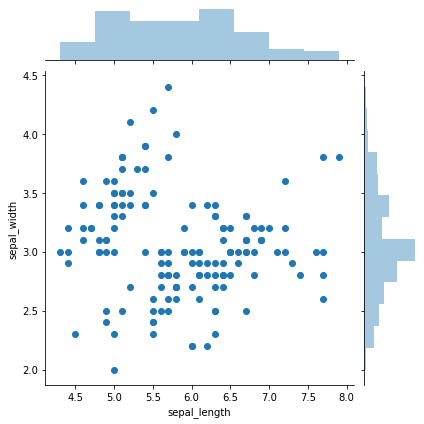

In [15]:
sns.jointplot(x='sepal_length', y='sepal_width', data=iris)

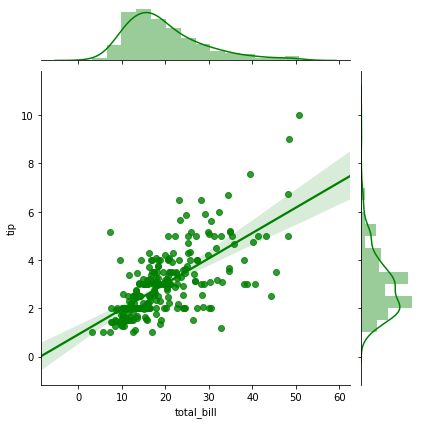

In [16]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='reg',
             color='green')

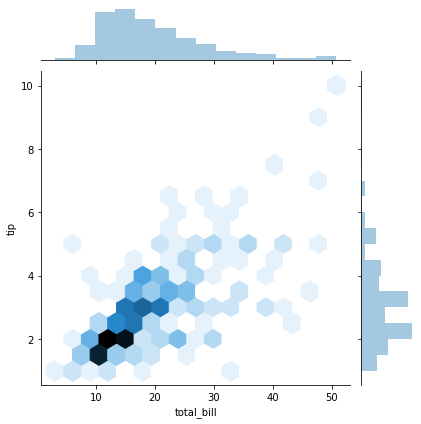

In [17]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex')

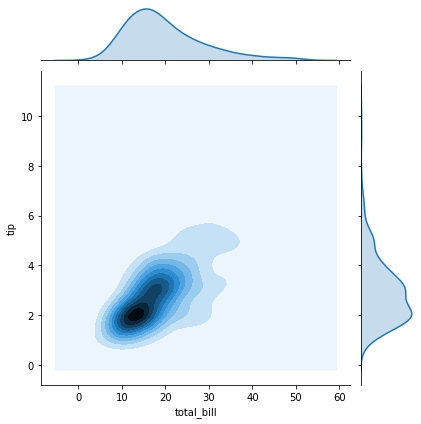

In [18]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='kde')

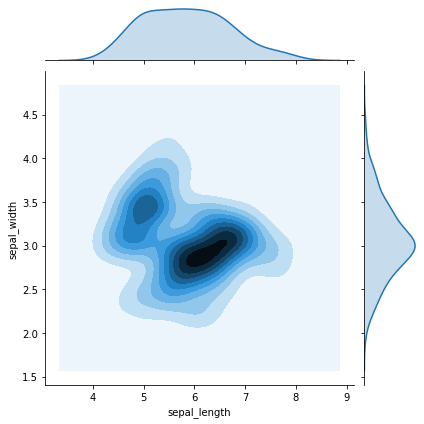

In [19]:
sns.jointplot(x='sepal_length', y='sepal_width', data=iris, kind='kde')

### Stat function

In [20]:
from scipy.stats import spearmanr

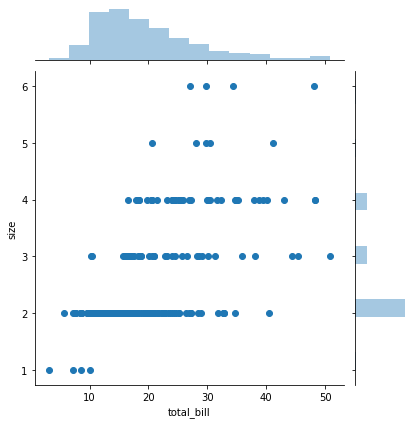

In [21]:
a=sns.jointplot(x='total_bill', y='size', data=tips)

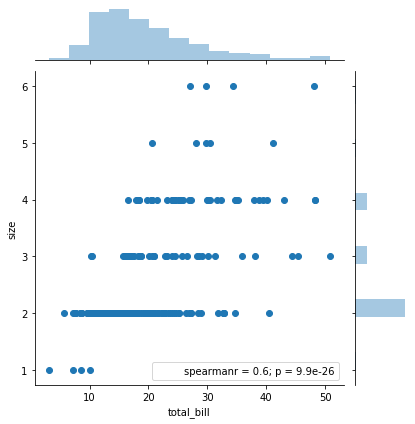

In [22]:
sns.jointplot(x='total_bill', y='size', data=tips, stat_func=spearmanr)

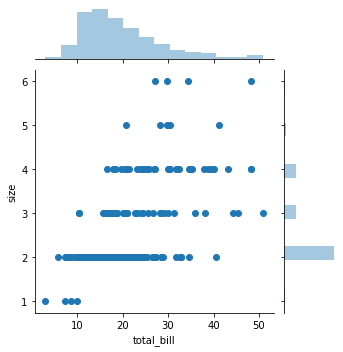

In [23]:
sns.jointplot(x='total_bill', y='size', data=tips, ratio=4, size=5)

## <center><a id='14'> Pair plot </a> </center>

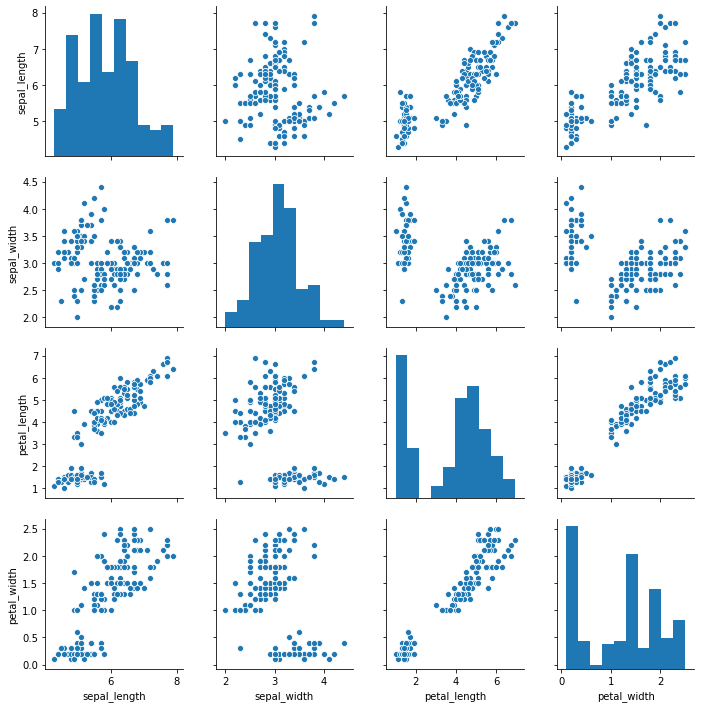

In [24]:
iris = sns.load_dataset('iris')
sns.pairplot(iris)

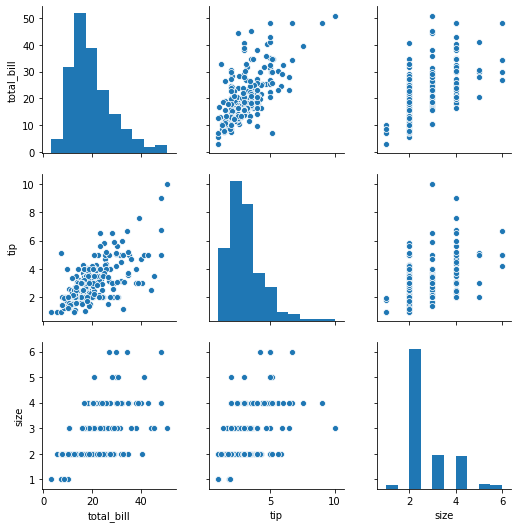

In [25]:
tips = sns.load_dataset('tips')
sns.pairplot(tips)

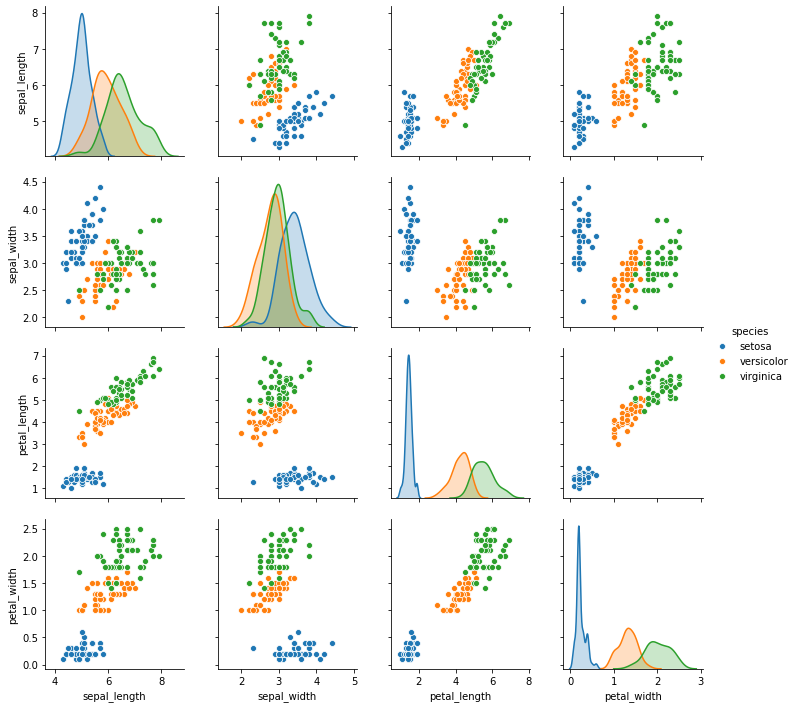

In [26]:
sns.pairplot(iris, hue='species')

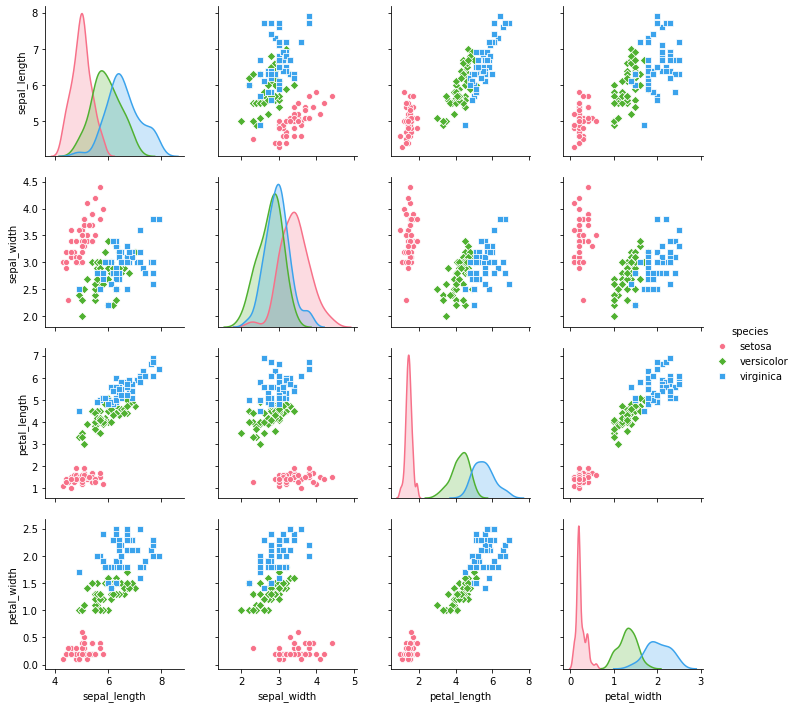

In [27]:
sns.pairplot(iris, hue='species', palette='husl', markers=['o', 'D', 's'])

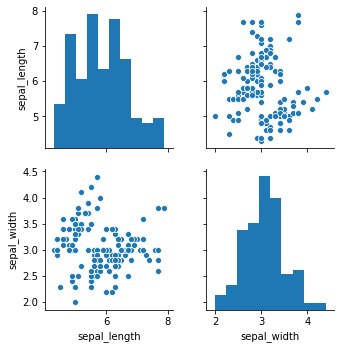

In [28]:
sns.pairplot(iris, vars=['sepal_length', 'sepal_width'])

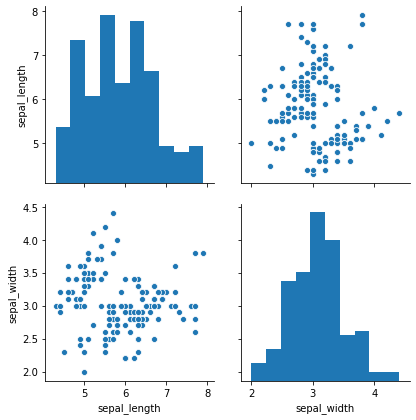

In [29]:
sns.pairplot(iris, size=3, vars=['sepal_length', 'sepal_width'])

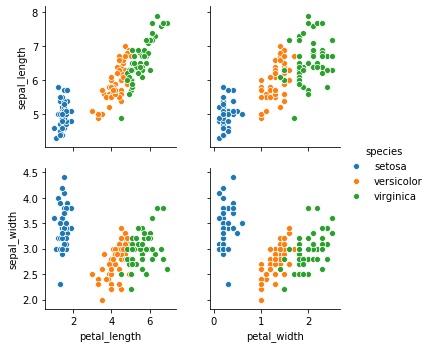

In [30]:
sns.pairplot(iris, x_vars=['petal_length', 'petal_width'], 
             y_vars=['sepal_length', 'sepal_width'], hue='species')

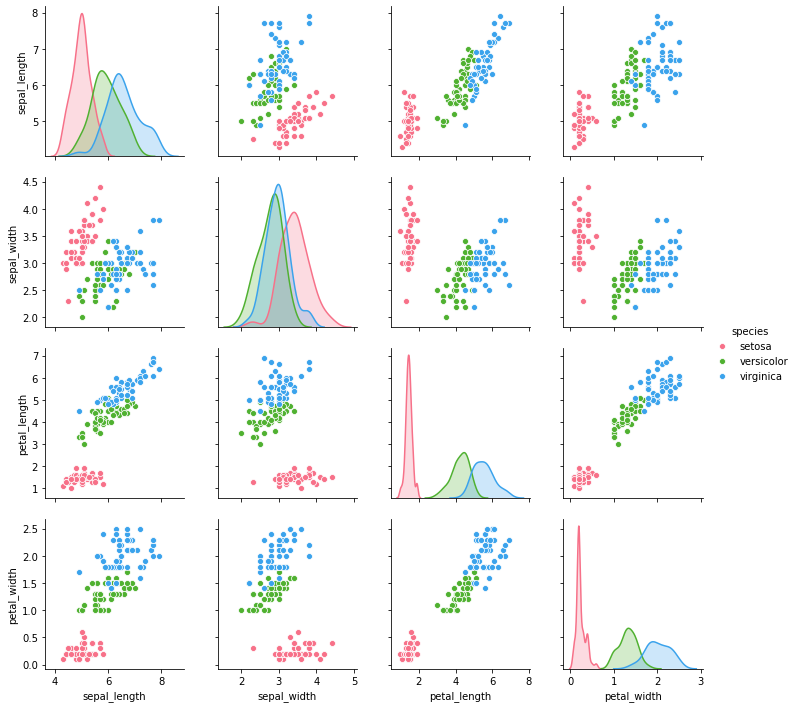

In [31]:
sns.pairplot(iris, diag_kind='kde', palette='husl', hue='species')

### Fit regression line.
- kind = 'reg'

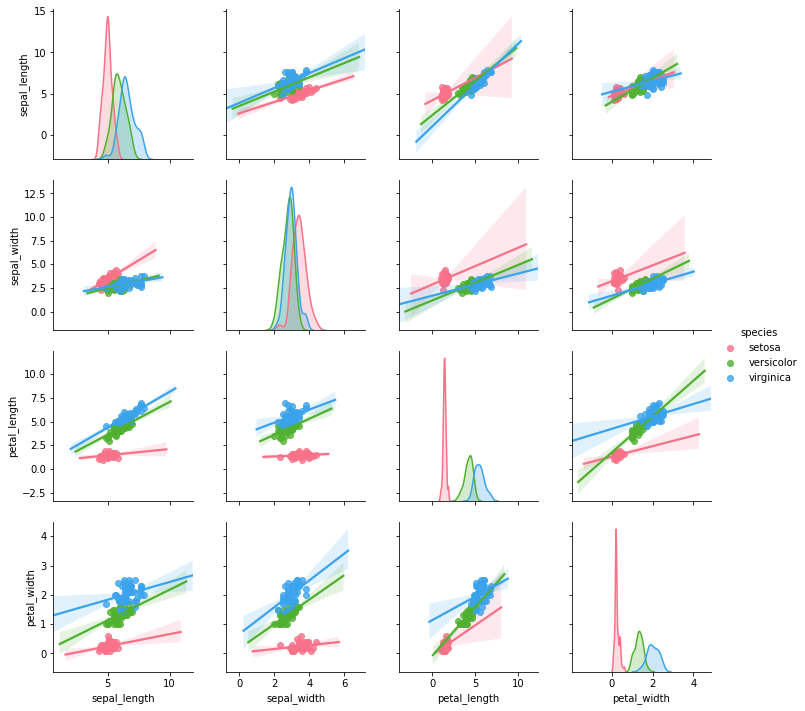

In [32]:
sns.pairplot(iris, diag_kind='kde', palette='husl', hue='species',
            kind='reg')

## <center><a id='15'> Catplot </a> </center>
The useful link for categorical plot in seaborn:
https://seaborn.pydata.org/generated/seaborn.catplot.html

The most important thing is that in case of catplot, the subplot method is not possible to be applied

In [33]:
import seaborn as sns
sns.set(style="ticks")
exercise = sns.load_dataset("exercise")
exercise.head()

Unnamed: 0  id     diet  pulse    time  kind
0           0   1  low fat     85   1 min  rest
1           1   1  low fat     85  15 min  rest
2           2   1  low fat     88  30 min  rest
3           3   2  low fat     90   1 min  rest
4           4   2  low fat     92  15 min  rest

In [34]:
exercise.describe()

Unnamed: 0         id       pulse
count   90.000000  90.000000   90.000000
mean    44.500000  15.500000   99.700000
std     26.124701   8.703932   14.858471
min      0.000000   1.000000   80.000000
25%     22.250000   8.000000   90.250000
50%     44.500000  15.500000   96.000000
75%     66.750000  23.000000  103.000000
max     89.000000  30.000000  150.000000

In [35]:
exercise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
Unnamed: 0    90 non-null int64
id            90 non-null int64
diet          90 non-null category
pulse         90 non-null int64
time          90 non-null category
kind          90 non-null category
dtypes: category(3), int64(3)
memory usage: 2.8 KB


Draw a single facet to use the FacetGrid legend placement:

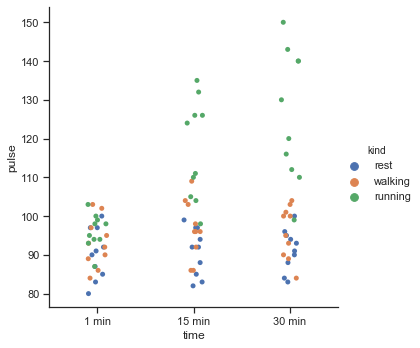

In [36]:
g = sns.catplot(x="time", y="pulse", hue="kind", data=exercise)

Use a different plot kind to visualize the same data:

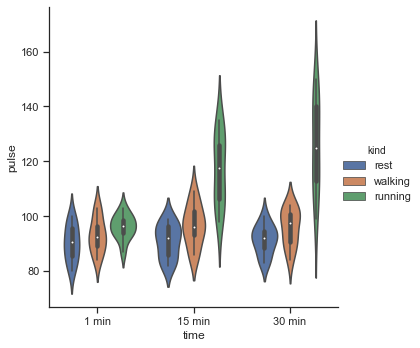

In [37]:
sns.catplot(x="time", y="pulse", hue="kind",data=exercise, kind="violin")

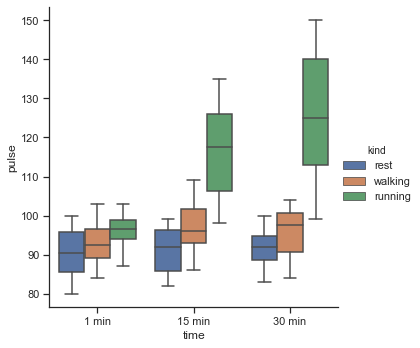

In [38]:
sns.catplot(x="time", y="pulse", hue="kind", data=exercise, kind="box")

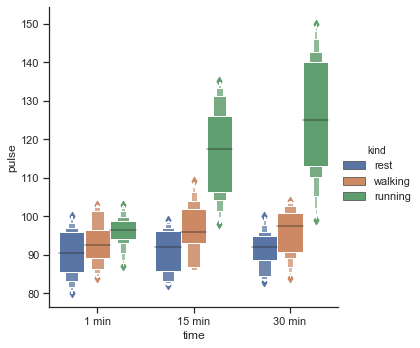

In [39]:
sns.catplot(x="time", y="pulse", hue="kind",data=exercise, kind="boxen")

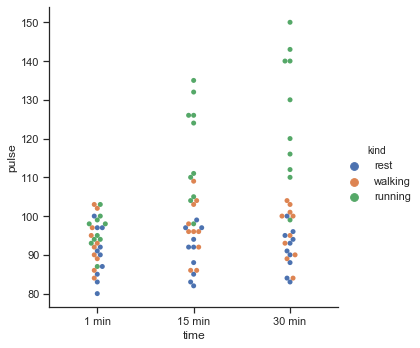

In [40]:
sns.catplot(x="time", y="pulse", hue="kind",data=exercise, kind="swarm")

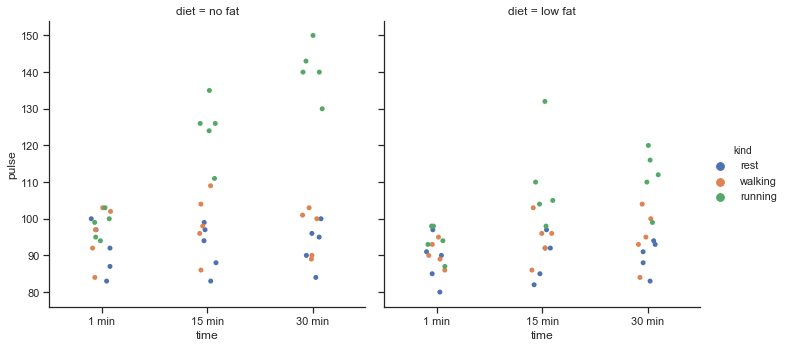

In [41]:
g = sns.catplot(x="time", y="pulse", hue="kind",
                col="diet", data=exercise)

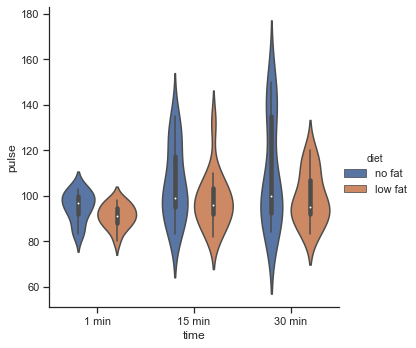

In [42]:
sns.catplot(x="time", y="pulse", hue="diet",data=exercise, kind="violin")

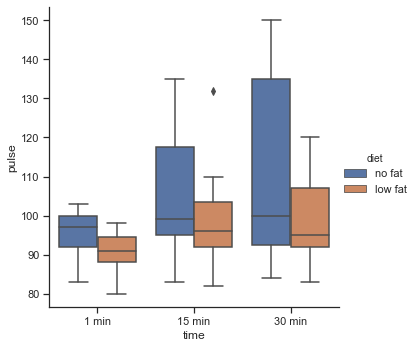

In [43]:
sns.catplot(x="time", y="pulse", hue="diet",data=exercise, kind="box")

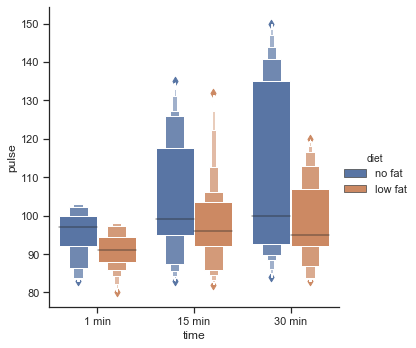

In [44]:
sns.catplot(x="time", y="pulse", hue="diet",data=exercise, kind="boxen")

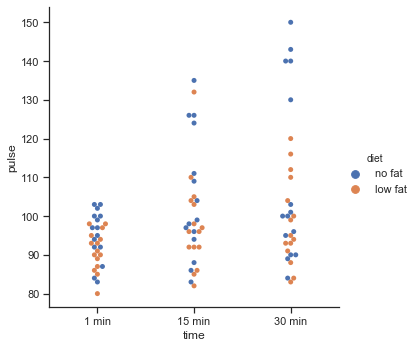

In [45]:
sns.catplot(x="time", y="pulse", hue="diet",data=exercise, kind="swarm")

Use a different height and aspect ratio for the facets:

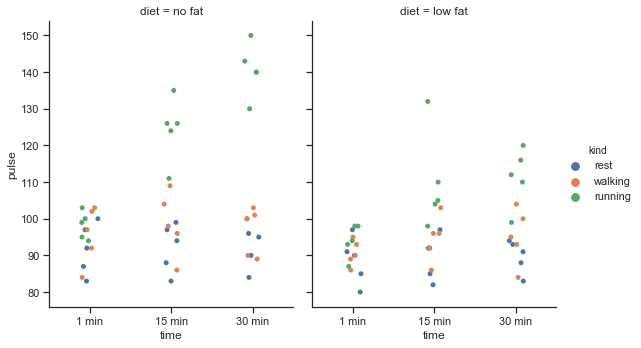

In [46]:
g = sns.catplot(x="time", y="pulse", hue="kind",
                col="diet", data=exercise,
                height=5, aspect=.8)

Make many column facets and wrap them into the rows of the grid:

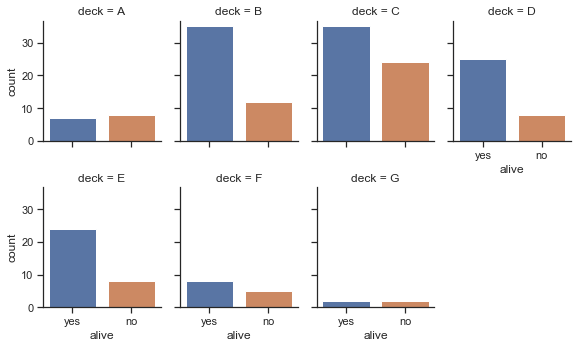

In [47]:
titanic = sns.load_dataset("titanic")
g = sns.catplot("alive", col="deck", col_wrap=4,
                data=titanic[titanic.deck.notnull()],
                kind="count", height=2.5, aspect=.8)

Plot horizontally and pass other keyword arguments to the plot function:

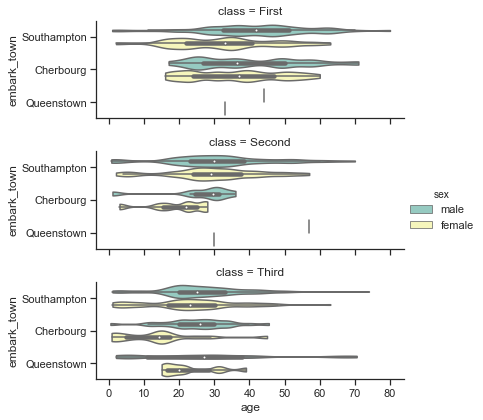

In [48]:
g = sns.catplot(x="age", y="embark_town",
                hue="sex", row="class",
                data=titanic[titanic.embark_town.notnull()],
                orient="h", height=2, aspect=3, palette="Set3",
                kind="violin", dodge=True, cut=0, bw=.2)

Use methods on the returned FacetGrid to tweak the presentation:

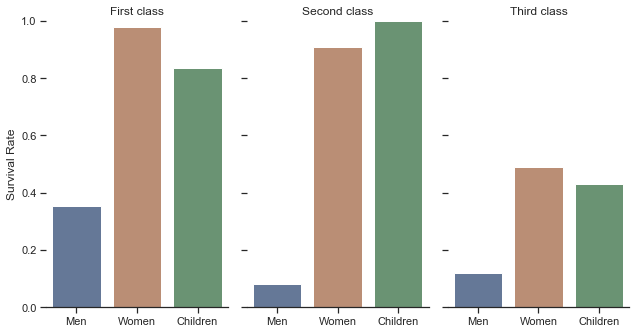

In [49]:
g = sns.catplot(x="who", y="survived", col="class",
                data=titanic, saturation=.5,
                kind="bar", ci=None, aspect=.6)
(g.set_axis_labels("", "Survival Rate")
  .set_xticklabels(["Men", "Women", "Children"])
  .set_titles("{col_name} {col_var}")
  .set(ylim=(0, 1))
  .despine(left=True))  

## <center><a id='16'> Pie Chart </a> </center>

The following website is crucial for drwaing Pie Diagram
https://python-graph-gallery.com/donut-plot/

In [61]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
iris = pd.read_csv("iris.csv")
iris.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [62]:
iris.describe()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000

In [63]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


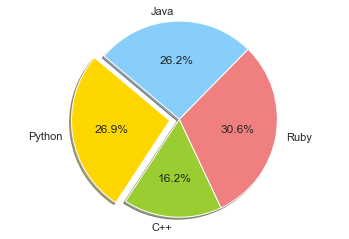

In [64]:
import matplotlib.pyplot as plt

# Data to plot
labels = 'Python', 'C++', 'Ruby', 'Java'
sizes = [215, 130, 245, 210]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

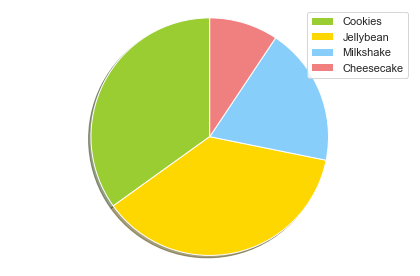

In [65]:
import matplotlib.pyplot as plt

labels = ['Cookies', 'Jellybean', 'Milkshake', 'Cheesecake']
sizes = [38.4, 40.6, 20.7, 10.3]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

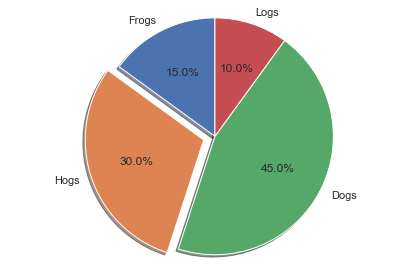

In [66]:
import matplotlib.pyplot as plt

# Pie chart
labels = ['Frogs', 'Hogs', 'Dogs', 'Logs']
sizes = [15, 30, 45, 10]
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0, 0.1, 0, 0)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

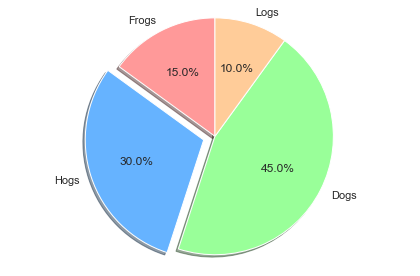

In [67]:
import matplotlib.pyplot as plt

# Pie chart
labels = ['Frogs', 'Hogs', 'Dogs', 'Logs']
sizes = [15, 30, 45, 10]
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0, 0.1, 0, 0)
#add colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.show()

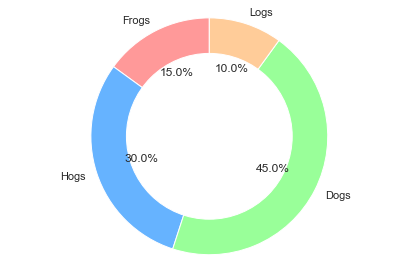

In [68]:
import matplotlib.pyplot as plt
# Pie chart
labels = ['Frogs', 'Hogs', 'Dogs', 'Logs']
sizes = [15, 30, 45, 10]
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

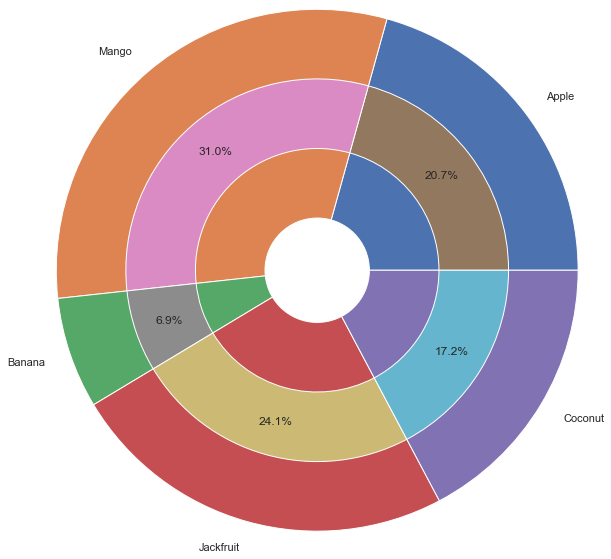

In [69]:
# Colorful pie diagram with diversified colors
fruit = {'Apple':30,'Mango':45,'Banana':10,'Jackfruit':35,'Coconut':25}
names  = list(fruit.keys())
quantity = list(fruit.values())
names,quantity
pie1 = plt.pie(quantity,labels=names,autopct='%1.1f%%',radius=3)
pie2 = plt.pie(quantity, radius=2.2)
pie3 = plt.pie(quantity, radius=1.4)
pie4 = plt.pie([5],colors='w', radius=0.6)
plt.show()

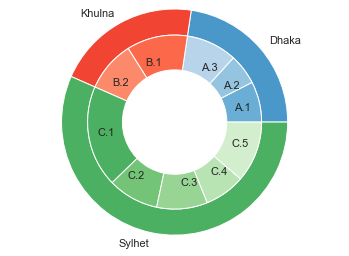

In [74]:
# Libraries
import matplotlib.pyplot as plt
 
# Make data: I have 3 groups and 7 subgroups
group_names=['Dhaka', 'Khulna', 'Sylhet']
group_size=[12,11,30]
subgroup_names=['A.1', 'A.2', 'A.3', 'B.1', 'B.2', 'C.1', 'C.2', 'C.3', 'C.4', 'C.5']
subgroup_size=[4,3,5,6,5,10,5,5,4,6]
 
# Create colors
a, b, c=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors=[a(0.6), b(0.6), c(0.6)] )
plt.setp( mypie, width=0.3, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, labeldistance=0.7, colors=[a(0.5), a(0.4), a(0.3), b(0.5), b(0.4), c(0.6), c(0.5), c(0.4), c(0.3), c(0.2)])
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
 
# show it
plt.show()

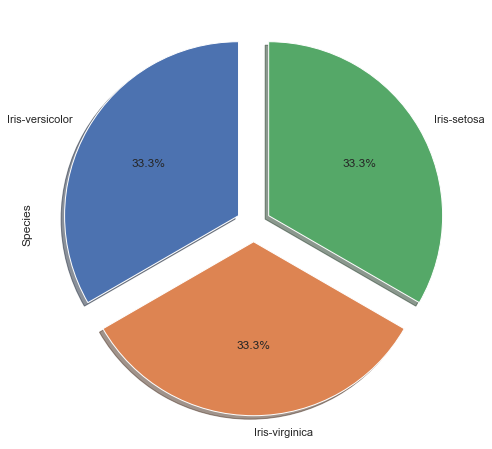

In [70]:
iris['Species'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',shadow=True,figsize=(10,8),startangle=90)
plt.show()

# Venn Diagram

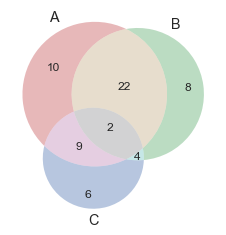

In [71]:
# Import the library
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
 
# Make the diagram
venn3(subsets = (10, 8, 22, 6,9,4,2))
plt.show()

## <center><a id='17'> Area Plot </a> </center>

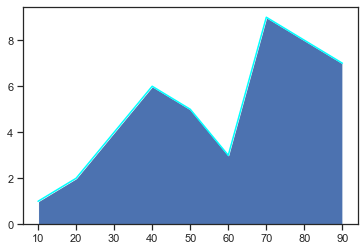

In [57]:
# area-plot
x = [10,20,30,40,50,60,70,80,90]
y = [1,2,4,6,5,3,9,8,7]
plt.stackplot(x,y)
plt.plot(x,y,color='cyan')     # Also insclude the line plot
plt.show()

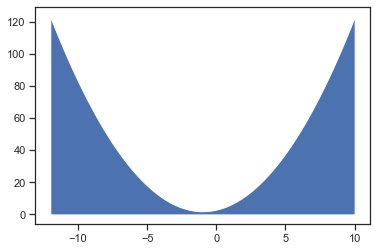

In [58]:
# Area-plot
import numpy as np
from matplotlib import pyplot as plt
m = np.arange(-12,10,0.001)
n = m**2+2*m+3
plt.stackplot(m,n)
plt.show()

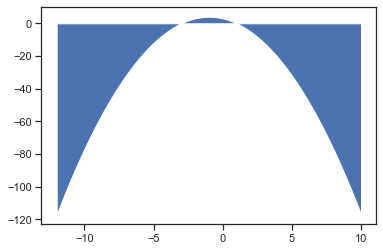

In [59]:
# Area-plot
import numpy as np
from matplotlib import pyplot as plt
m = np.arange(-12,10,0.001)
n = -m**2-2*m+3
plt.stackplot(m,n)
plt.show()

## <center><a id='18'> Geographic Plot </a> </center>

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import MaxNLocator, FuncFormatter
import calendar
import folium
from folium import plugins
amazon_dataframe = pd.read_csv("amazon.csv",encoding = "latin1")
months_renaming = {"Janeiro": "January",
                  "Fevereiro": "February",
                  "Março": "March",
                  "Abril": "April",
                  "Maio": "May",
                  "Junho": "June",
                  "Julho": "July",
                  "Agosto": "August",
                  "Setembro": "September",
                  "Outubro": "October",
                  "Novembro": "November",
                  "Dezembro": "December"}

amazon_dataframe = amazon_dataframe.replace(months_renaming)
amazon_dataframe["date"] = pd.to_datetime(amazon_dataframe["date"])

amazon_dataframe.head()

year state    month  number       date
0  1998  Acre  January     0.0 1998-01-01
1  1999  Acre  January     0.0 1999-01-01
2  2000  Acre  January     0.0 2000-01-01
3  2001  Acre  January     0.0 2001-01-01
4  2002  Acre  January     0.0 2002-01-01

#### New Column: Latitude & Longtitude

In [78]:
latitude={
    'Acre':-9.02,'Alagoas':-9.57,'Amapa':02.05,'Amazonas':-5.00,'Bahia':-12.00,'Ceara':-5.00,
          
    'Distrito Federal':-15.45,'Espirito Santo':-20.00,'Goias':-15.55,'Maranhao':-5.00,'Mato Grosso':-14.00
      
    ,'Minas Gerais':-18.50,'Pará':-3.20,'Paraiba':-7.00,'Pernambuco':-8.00,'Piau':-7.00,'Rio':-22.90,
          
    'Rondonia':-11.00,'Roraima':-2.00,'Santa Catarina':-27.25,'Sao Paulo':-23.32,'Sergipe':-10.30,
         
    'Tocantins':-10.00
    }


longitude={
    'Acre':-70.8120,'Alagoas':-36.7820,'Amapa':-50.50,'Amazonas':-65.00,'Bahia':-42.00,'Ceara':-40.00,
    
    'Distrito Federal':-47.45,'Espirito Santo':-40.45,'Goias':-50.10,'Maranhao':-46.00,'Mato Grosso':-55.00,
    
    'Minas Gerais':-46.00,'Pará':-52.00,'Paraiba':-36.00,'Pernambuco':-37.00,'Piau':-73.00, 'Rio':-43.17,
    
    'Rondonia':-63.00,'Roraima':-61.30,'Santa Catarina':-48.30,'Sao Paulo':-46.37,'Sergipe':-37.30,
    
    'Tocantins':-48.00
    }

amazon_dataframe["latitude"] = amazon_dataframe["state"].map(latitude)
amazon_dataframe["longitude"] = amazon_dataframe["state"].map(longitude)
amazon_dataframe.head()

year state    month  number       date  latitude  longitude
0  1998  Acre  January     0.0 1998-01-01     -9.02    -70.812
1  1999  Acre  January     0.0 1999-01-01     -9.02    -70.812
2  2000  Acre  January     0.0 2000-01-01     -9.02    -70.812
3  2001  Acre  January     0.0 2001-01-01     -9.02    -70.812
4  2002  Acre  January     0.0 2002-01-01     -9.02    -70.812

#### Distribution of Fires between 1998-2017 by Geospatial Localization

In [79]:
brasil_map = folium.Map(location=[-16.1237611, -59.9219642], zoom_start=3.5, tiles='Stamen Terrain')
brasil_map

fires = plugins.MarkerCluster().add_to(brasil_map) 

for latitude, longitude in zip(amazon_dataframe.latitude, amazon_dataframe.longitude):
    folium.Marker(location=[latitude, longitude],icon=None,).add_to(fires)
    
brasil_map

## <center><a id='19'> Stack Plot </a> </center>

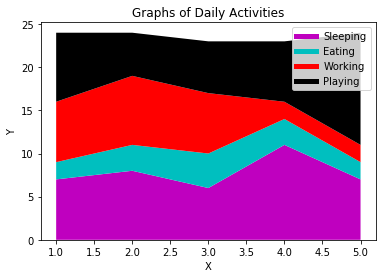

In [39]:
days = [1,2,3,4,5]
sleeping = [7,8,6,11,7]
eating = [2,3,4,3,2]
working = [7,8,7,2,2]
playing = [8,5,6,7,13]
plt.plot([],[],color='m',label='Sleeping',linewidth=5)
plt.plot([],[],color='c',label='Eating',linewidth=5)
plt.plot([],[],color='r',label='Working',linewidth=5)
plt.plot([],[],color='k',label='Playing',linewidth=5)

plt.stackplot(days,sleeping,eating,working,playing,colors=['m','c','r','k'])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Graphs of Daily Activities')
plt.legend()
plt.show()

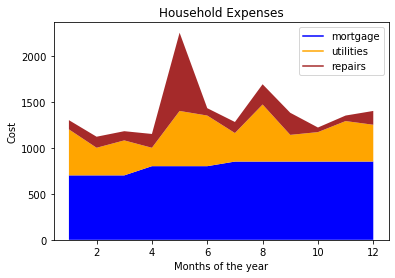

In [40]:
import matplotlib.pyplot as plt

months= [x for x in range(1,13)]

mortgage= [700, 700, 700,
           800, 800, 800,
           850, 850, 850,
           850, 850, 850]

utilities= [500, 300, 380,
           200, 600, 550,
           310, 620, 290,
           320, 440, 400]

repairs= [100, 120, 100,
          150, 850, 80,
          120, 220, 240,
          50, 60, 150]

plt.plot([],[], color='blue', label='mortgage')
plt.plot([],[], color='orange', label='utilities')
plt.plot([],[], color='brown', label='repairs')


plt.stackplot(months, mortgage, utilities, repairs, colors=['blue', 'orange', 'brown'])

plt.legend()

plt.title('Household Expenses')
plt.xlabel('Months of the year')
plt.ylabel('Cost')

plt.show()

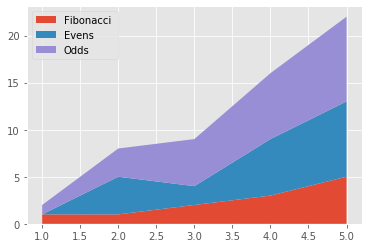

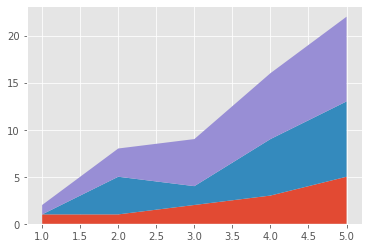

In [47]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y1 = [1, 1, 2, 3, 5]
y2 = [0, 4, 2, 6, 8]
y3 = [1, 3, 5, 7, 9]

y = np.vstack([y1, y2, y3])

labels = ["Fibonacci ", "Evens", "Odds"]

fig, ax = plt.subplots()
ax.stackplot(x, y1, y2, y3, labels=labels)
ax.legend(loc='upper left')
plt.show()

fig, ax = plt.subplots()
ax.stackplot(x, y)
plt.show()

Here we show an example of making a streamgraph using stackplot

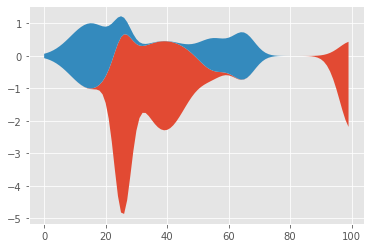

In [48]:
def layers(n, m):
    """
    Return *n* random Gaussian mixtures, each of length *m*.
    """
    def bump(a):
        x = 1 / (.1 + np.random.random())
        y = 2 * np.random.random() - .5
        z = 10 / (.1 + np.random.random())
        for i in range(m):
            w = (i / m - y) * z
            a[i] += x * np.exp(-w * w)
    a = np.zeros((m, n))
    for i in range(n):
        for j in range(5):
            bump(a[:, i])
    return a


d = layers(3, 100)

fig, ax = plt.subplots()
ax.stackplot(range(100), d.T, baseline='wiggle')
plt.show()

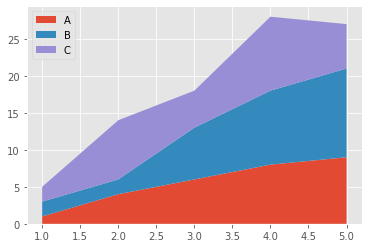

In [49]:
x=range(1,6)
y1=[1,4,6,8,9]
y2=[2,2,7,10,12]
y3=[2,8,5,10,6]
 
# Basic stacked area chart.
plt.stackplot(x,y1, y2, y3, labels=['A','B','C'])
plt.legend(loc='upper left')

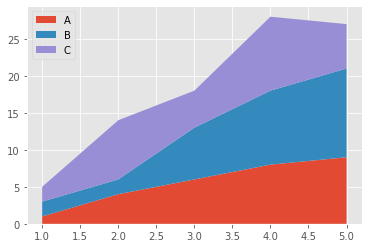

In [50]:
# Alternative way
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
# Data
x=range(1,6)
y=[ [1,4,6,8,9], [2,2,7,10,12], [2,8,5,10,6] ]
 
# Plot
plt.stackplot(x,y, labels=['A','B','C'])
plt.legend(loc='upper left')
plt.show()

#### Area Chart and Faceting
- https://python-graph-gallery.com/
- https://python-graph-gallery.com/242-area-chart-and-faceting/

In [51]:
# libraries
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
 
# Create a dataset
my_count=["France","Australia","Japan","USA","Germany","Congo","China","England","Spain","Greece","Marocco","South Africa","Indonesia","Peru","Chili","Brazil"]
df = pd.DataFrame({
"country":np.repeat(my_count, 10),
"years":range(2000, 2010) * 16,
"value":np.random.rand(160)
})
 
# Create a grid : initialize it
g = sns.FacetGrid(df, col='country', hue='country', col_wrap=4, )
 
# Add the line over the area with the plot function
g = g.map(plt.plot, 'years', 'value')
 
# Fill the area with fill_between
g = g.map(plt.fill_between, 'years', 'value', alpha=0.2).set_titles("{col_name} country")
 
# Control the title of each facet
g = g.set_titles("{col_name}")
 
# Add a title for the whole plo
plt.subplots_adjust(top=0.92)
g = g.fig.suptitle('Evolution of the value of stuff in 16 countries')
 
plot.show()

TypeError: unsupported operand type(s) for *: 'range' and 'int'

## <center><a id='20'> Contour Plot </a> </center>

The detail about the **Contour Plot** is available here https://jakevdp.github.io/PythonDataScienceHandbook/04.04-density-and-contour-plots.html

## <center><a id='21'> Quiver Plot </a> </center>

## <center><a id='22'> Spectrograms </a> </center>

## <center><a id='23'> Stem Plot </a> </center>

## References:
- [Link to the official Seaborn Documentation](https://seaborn.pydata.org/)
- [Python for Data Visualization - using Seaborn](https://www.youtube.com/playlist?list=PL998lXKj66MpNd0_XkEXwzTGPxY2jYM2d)

### I will add more plots in the future. Hope, this kernel helps you to visualize better and improve your skills.
### Do UPVOTE if you find it useful.